# Assignment #3 - Neural Networks

### <font color="red"> DUE: Mar 28 (Thursday) 11:00 pm </font>  

<font color="blue"> Sumedh Joglekar </font>

# I. Overview

The objective of this assignment is to implement Neural Network on regression and classification data. We were supposed to implement 5-fold cross validation for the testing with the help of different parameters.

Non-linear regression model needs to be applied on regression data.Non-linear logistic regression model is applied on the classification data.K-fold is used to find the best parameter to train our model and test it on test data.

# II. Data

For this assignment, I have selected the 'California Housing Price' dataset. This data set contains the information about the population, households, house location(longitude, latitude), price information, number of rooms/bedrooms etc. With the use of these features regression model can be developed for the prediction. Below are the detailed description of each columns present in this dataset.

## Description :- 

1. longitude, latitude : It gives the information about the location of the house. 
2. totalRooms: Total number of rooms present in the house
3. totalBedrooms: Total number of bedrooms present in the house
4. population: Population within particular area
5. households: It gives information related to the group of people residing within a particular home.
6. housingMedianAge: Median age of a house within a block
7. medianIncome: Median income(in ten thousand USD) for households within a block
8. medianHouseValue: Median house value for households (in USD)
9. OceanProximity: Location of the house from ocean

## Source :

https://www.kaggle.com/neuromusic/avocado-prices


In [152]:
### Importing the required libraries ######

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
#############################################

## Reading the data 

Here I am reading the data from CSV file with the use of pandas read_csv function.

P.S. :- Place the file path in read_csv function while running the code so that csv file will get read.

In [153]:
######### Read CSV file and select all the features ############
data = pd.read_csv("housing.csv", encoding='utf-8')# Place the file location here.
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [154]:
#################  Checking for thr null Values ################
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [155]:
#################  Dropping the null Values ################
data = data.dropna()
print("Data Shape is :- ",data.shape)
data.isnull().sum()

Data Shape is :-  (20433, 10)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Visualization using plots and Preliminary Observation of data 

Text(0.5, 1.0, 'Count of Geographic Categories')

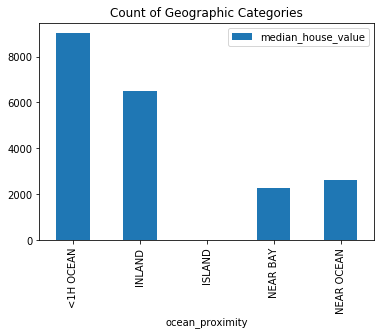

In [156]:
################# Data Visualization to see the number of houses near ocean proximity. #################
datafram_bar = data[['ocean_proximity', 'median_house_value']]
#datafram_bar.columns = ['ocean_proximity', 'count']
datafram_bar.groupby('ocean_proximity').count().plot(kind='bar')
plt.title('Count of Geographic Categories')

### Preliminary Observation :-

- Above bar graph shows that number of houses present at distance greater than 1 hour from ocean are more.
- But this does not give the much information about the distribution of housholds. Hence we need to plot graphs against different features so that best features can be selected for the training and prediction.

In order to find the correlation between different features, plotting correlation matrix graph.

population            0.025300
longitude             0.045398
total_bedrooms        0.049686
households            0.064894
housing_median_age    0.106432
total_rooms           0.133294
latitude              0.144638
median_income         0.688355
Name: median_house_value, dtype: float64

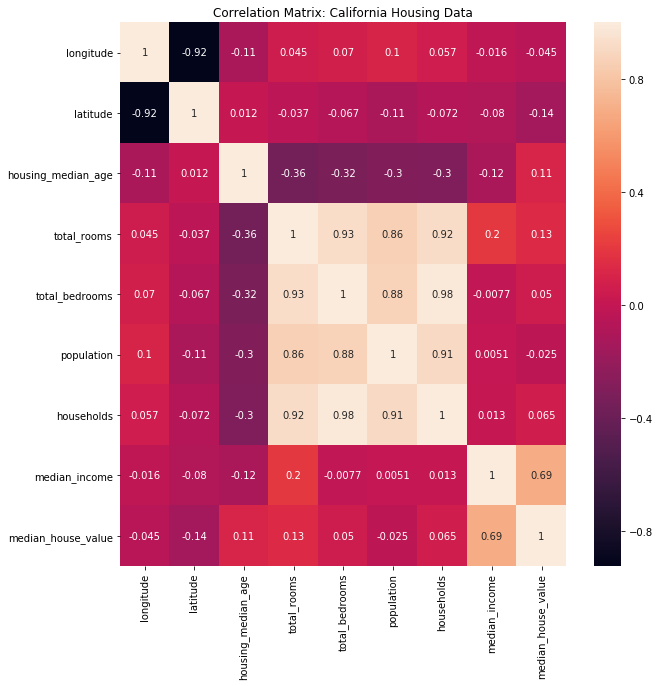

In [157]:
##### Plotting Correlation matrix to check the relation between different features ####
corr_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot= True)
plt.title('Correlation Matrix: California Housing Data')
feature_list = abs(corr_matrix.iloc[:-1,-1]).sort_values()
feature_list

### Preliminary Observation :-

Above correlation matrix shows that total_rooms,total_bedrooms,population,households are strongly connected to each others and these features can be used for the regression to have better results.

- Plotting histogram of all features to check the data distribution. This will be hepful to check how data is distributed, any outliers are present or not, data is normalized or not, etc.

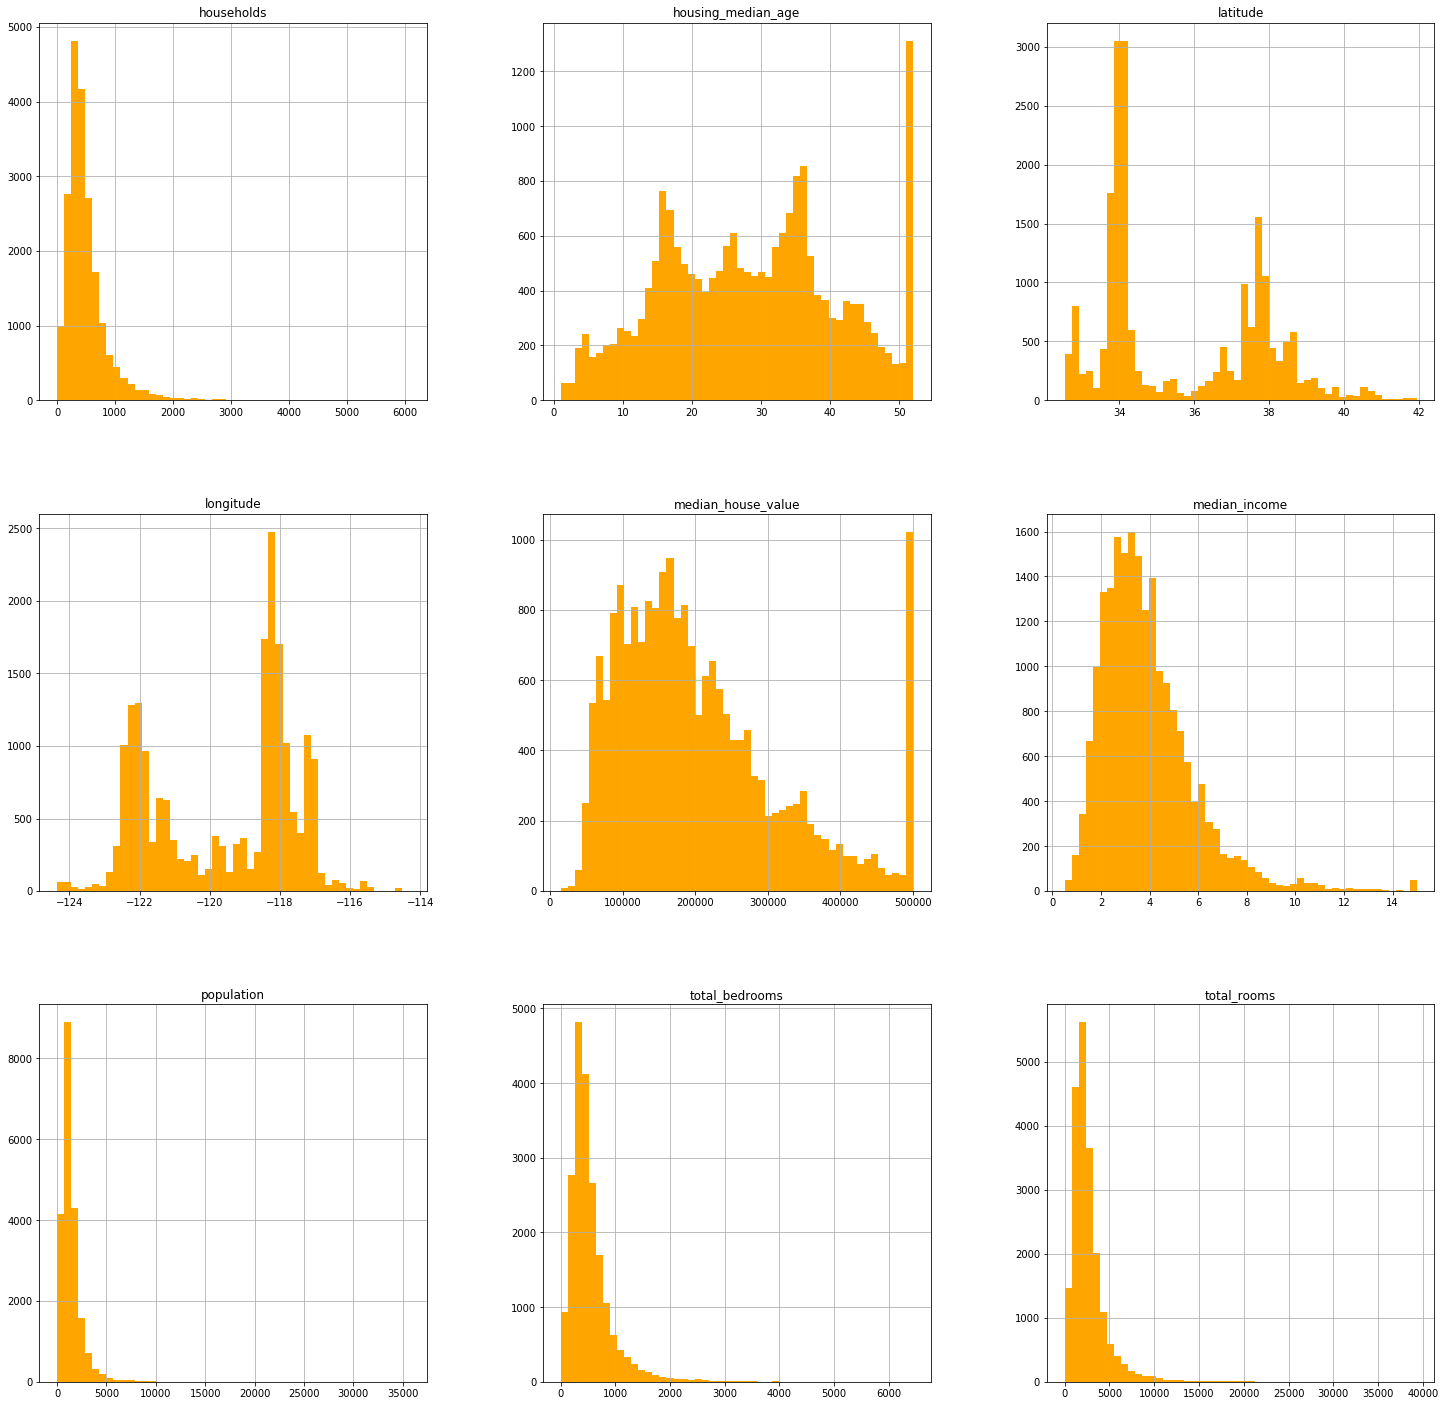

In [158]:
#### Now plotting histogram for all features to check distribution #######
data.hist(bins=50, figsize=(25,25),color = 'orange')
plt.show()

### Preliminary Observation:-

- As the data is not distributed uniformly, we will have many outliers in such case. Next step will be to remove such outliers are they might be present due to the wrong data. 
- But before proecessing and removal of outlier, plotting scatter graph to see the relation(linear,quadraric etc) with target variable(household).

#### Separating out feature matrix and target matrix from main data  frame.

In [159]:
X_total = data[['population','total_bedrooms','median_income','total_rooms','longitude','latitude','median_house_value','housing_median_age']].copy()
T_total = data[['households']].copy()

#### Plotting scatter plot of all selected features against the target variable to see the distribution of feature variable against target variable.

Feature Set :-  ['population' 'total_bedrooms' 'median_income' 'total_rooms' 'longitude'
 'latitude' 'median_house_value' 'housing_median_age']


<Figure size 432x288 with 0 Axes>

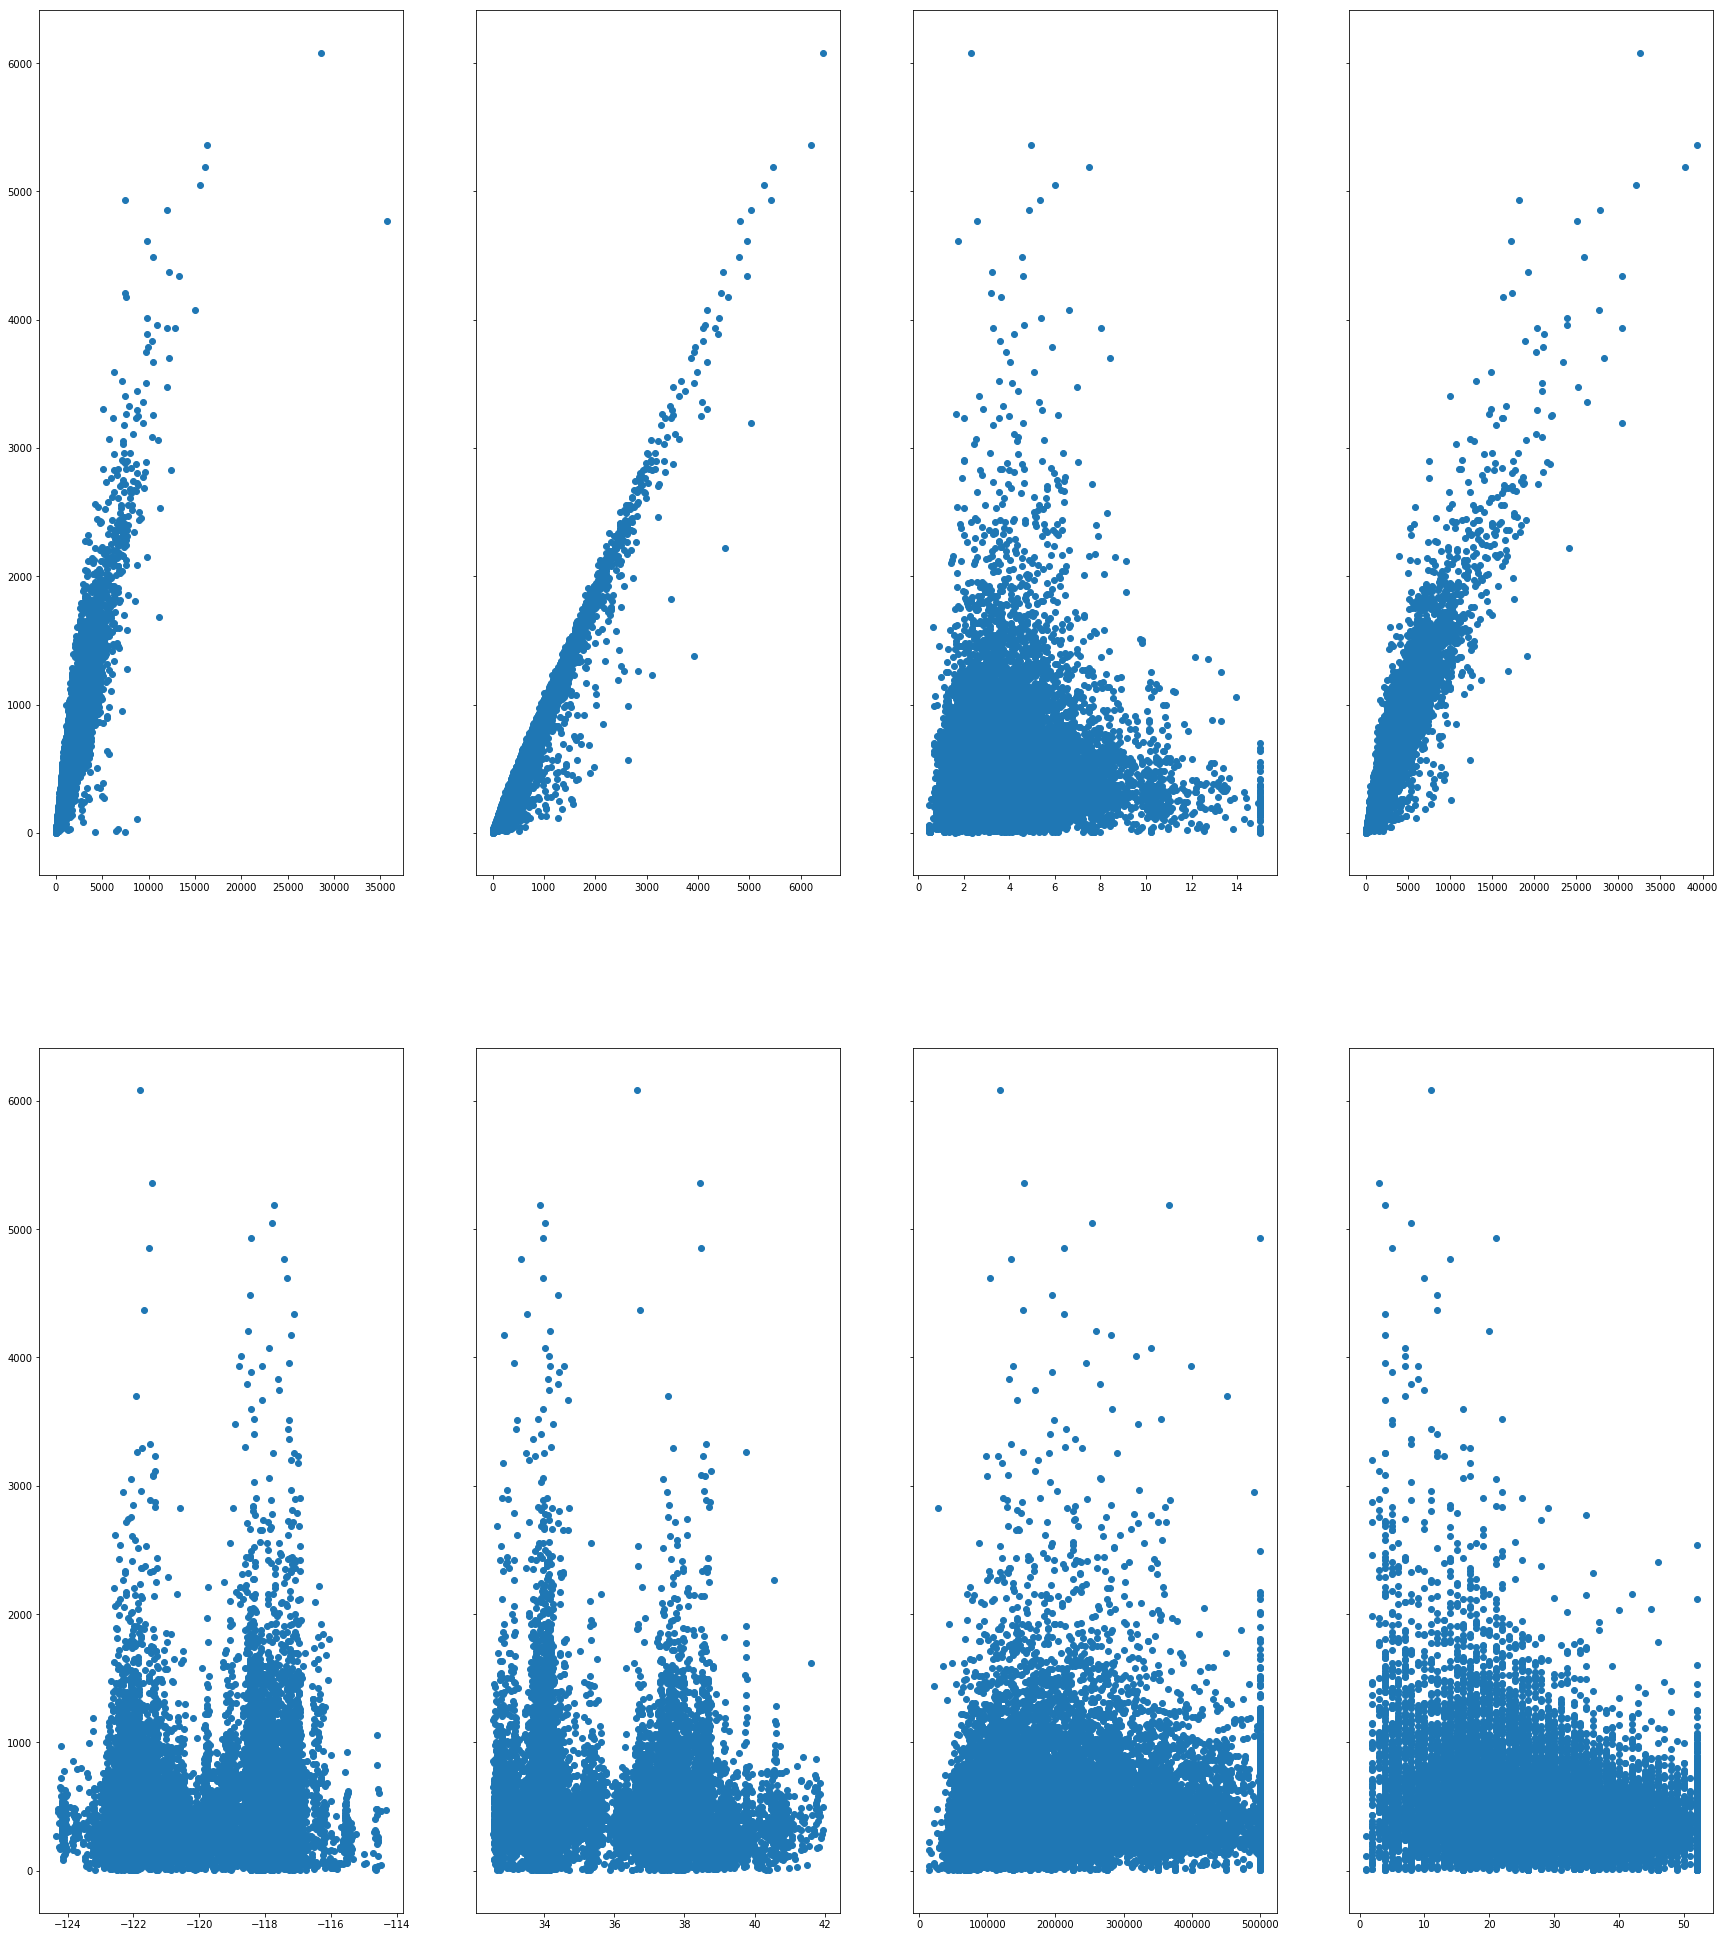

In [160]:
##### Scatter plot of features vs. target variable #####
f = plt.figure()
f, axes =plt.subplots(2,4,figsize=(30,35),sharey=True)
#print(X_total.shape,T_total.shape)
print("Feature Set :- ",X_total.columns.values)
#for i in range(1,X_total.shape[1]):
    #plt.scatter(X_total[X_total.columns.values[i]],T_total.households,ax=axes[i%6])
    #plt.show()
axes[0][0].scatter(X_total[X_total.columns.values[0]],T_total.households)
axes[0][1].scatter(X_total[X_total.columns.values[1]],T_total.households)
axes[0][2].scatter(X_total[X_total.columns.values[2]],T_total.households)
axes[0][3].scatter(X_total[X_total.columns.values[3]],T_total.households)
axes[1][0].scatter(X_total[X_total.columns.values[4]],T_total.households)
axes[1][1].scatter(X_total[X_total.columns.values[5]],T_total.households)
axes[1][2].scatter(X_total[X_total.columns.values[6]],T_total.households)
axes[1][3].scatter(X_total[X_total.columns.values[7]],T_total.households)
plt.show()

### Preliminary Observation :- 

- Above scatter plot describes the data-set in more detailed manner. From above graph it can be inferred that features in first row are linearly dependant on target variable. Hence these features can be consdered while traning the model to have more accuracy.


- One of the important observation can be done is that there are many outliers present in the data. So before training LS and LMS we need to remove them. As a result next step will be to remove the outliers as outliers may affect the prediction.

- Now analysing each and every possible feature using Box-plots to check mean, quaniles and exteme points in the sampled data-set.

Features considered for box-plot :- 
1 . housing_median_age
2 . total_rooms
3 . total_bedrooms
4 . population
5 . households
6 . median_income
7 . median_house_value


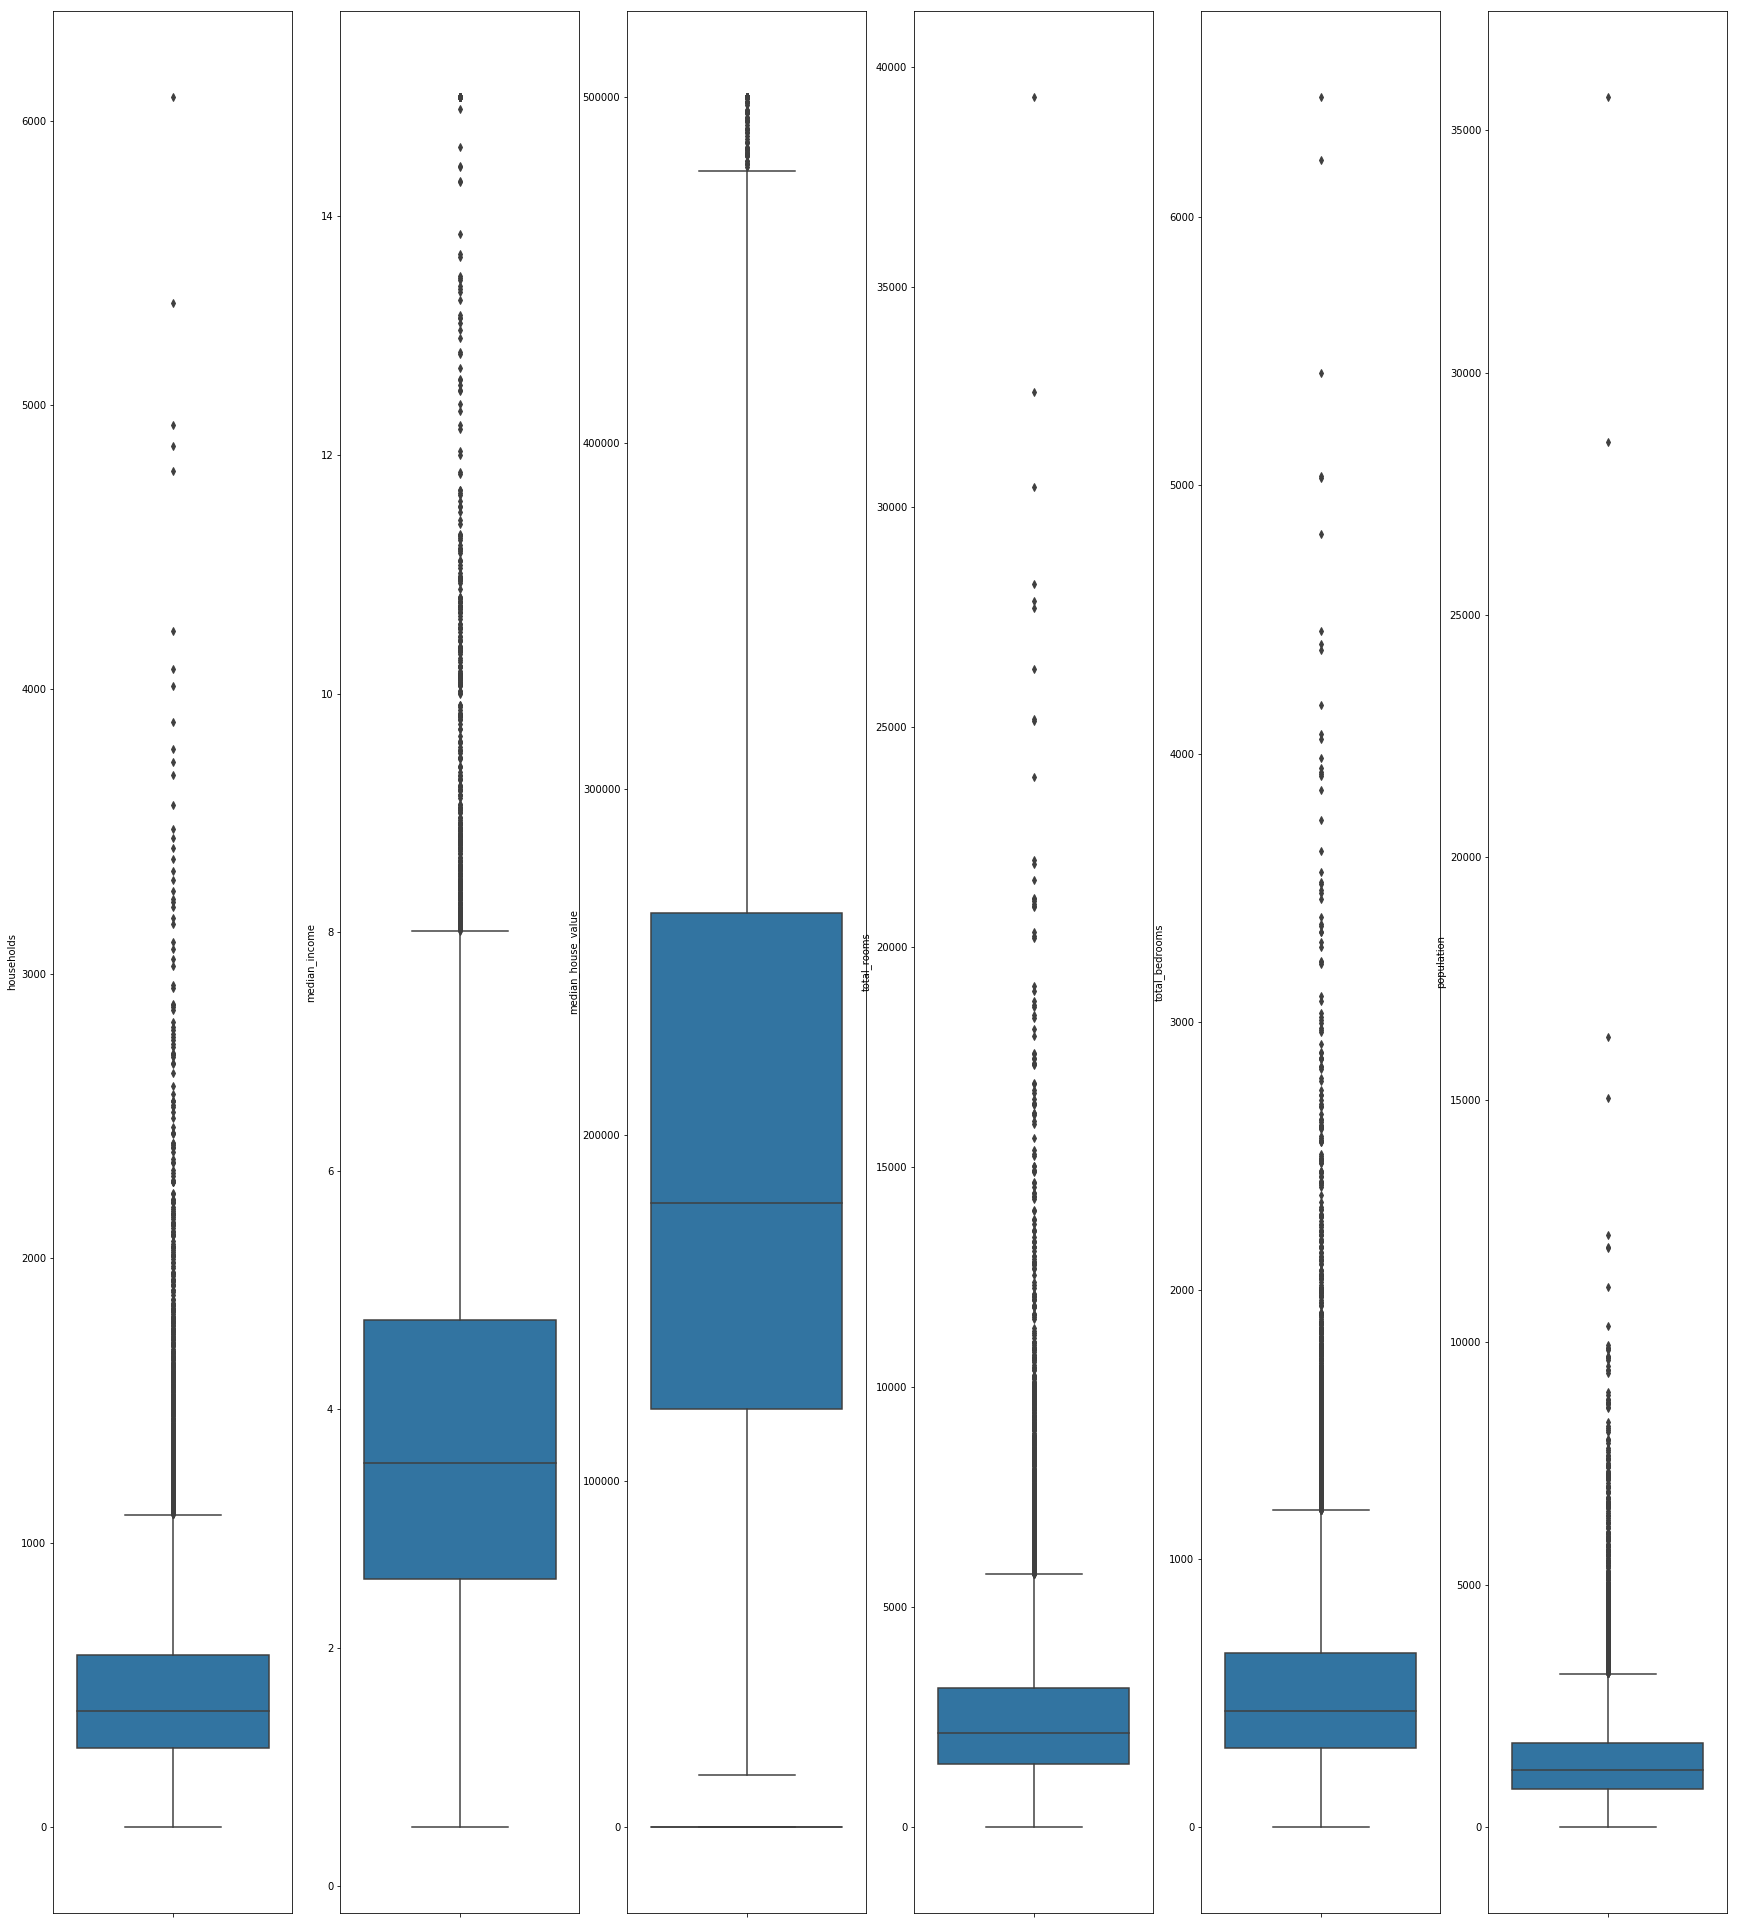

In [161]:
################# Sampling out 12000 data points and plotting box-plots on it ##################
data2 = data.sample(12000)
print("Features considered for box-plot :- ")
fig, axes =plt.subplots(1,6,figsize=(30,35))
for i in range (2,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(i-1,".",data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%6])

### Preliminary Observation :- 

Above box plot confirms that there are many outliers present in the data , mainly in household, total room , total bedroom, population.

Removing these outliers below, in the pre-processing part so that it will not cause problem while training.

## Pre-processing of Data :- 

First we will remove the outliers which are present in the feature set, so that we can only have the required and well distributed data points to work on.

In [162]:
######################### Function to remove outliers ##########################
def findOutliers(dataframe,column):
    #column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    print("Description of :-",column,"\n --------------------------------")
    print(des)
    cummulative = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Quantile1 = des[cummulative['25']]
    Quantile3 = des[cummulative['75']]
    IQR = Quantile3-Quantile1
    lowerBound = Quantile1-1.5*IQR
    upperBound = Quantile3+1.5*IQR
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]
    print("-------------------Removing outliers -----------------")
    #remove the outliers from the dataframe
    outlier = dataframe[~dataframe[column].isin(data[column])]
    return outlier

In [163]:
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"population")
print(data2.shape)

Description of :- population 
 --------------------------------
count    12000.000000
mean      1427.833667
std       1154.702102
min          3.000000
25%        785.000000
50%       1167.000000
75%       1737.250000
max      35682.000000
Name: population, dtype: float64
-------------------Removing outliers -----------------
(11329, 10)


In [164]:
data2 = findOutliers(data2,"total_bedrooms")
print("Data Value after removing outliers : ",data2.shape)
data2 = findOutliers(data2,"households")
print("Data Value after removing outliers : ",data2.shape)

Description of :- total_bedrooms 
 --------------------------------
count    11329.000000
mean       473.308677
std        276.039012
min          2.000000
25%        287.000000
50%        419.000000
75%        605.000000
max       3923.000000
Name: total_bedrooms, dtype: float64
-------------------Removing outliers -----------------
Data Value after removing outliers :  (10965, 10)
Description of :- households 
 --------------------------------
count    10965.000000
mean       415.949202
std        206.839304
min          2.000000
25%        268.000000
50%        386.000000
75%        543.000000
max       1088.000000
Name: households, dtype: float64
-------------------Removing outliers -----------------
Data Value after removing outliers :  (10841, 10)


* Removing outliers from population, total_bedroom, households may not be sufficient as there are some extreme values present in median_income, total_rooms. Hence removing them as well to have more better data distribution.

In [165]:
############# Removing the ouliers from rest features (median_income,total_rooms) ######################
data2 = findOutliers(data2,"median_income")
print("Data Value after removing outliers : ",data2.shape)
data2 = findOutliers(data2,"total_rooms")
print("Data Value after removing outliers : ",data2.shape)
data2 = findOutliers(data2,"total_bedrooms")
data2 = findOutliers(data2,"population")
print("Data Value after removing outliers : ",data2.shape)
X_total = data2[['population','total_bedrooms','median_income','latitude','median_house_value','housing_median_age']].copy()
T_total = data2[['households']].copy()

Description of :- median_income 
 --------------------------------
count    10841.000000
mean         3.869440
std          1.924569
min          0.499900
25%          2.562500
50%          3.531300
75%          4.742200
max         15.000100
Name: median_income, dtype: float64
-------------------Removing outliers -----------------
Data Value after removing outliers :  (10459, 10)
Description of :- total_rooms 
 --------------------------------
count    10459.000000
mean      2137.774453
std       1097.045336
min          6.000000
25%       1365.000000
50%       1976.000000
75%       2766.500000
max       7104.000000
Name: total_rooms, dtype: float64
-------------------Removing outliers -----------------
Data Value after removing outliers :  (10256, 10)
Description of :- total_bedrooms 
 --------------------------------
count    10256.000000
mean       430.843506
std        206.347146
min          2.000000
25%        281.000000
50%        403.500000
75%        562.000000
max       1079

Again plotting, box-plots after removal of outliers to see the effect of pre-processing part on the data. 

housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value


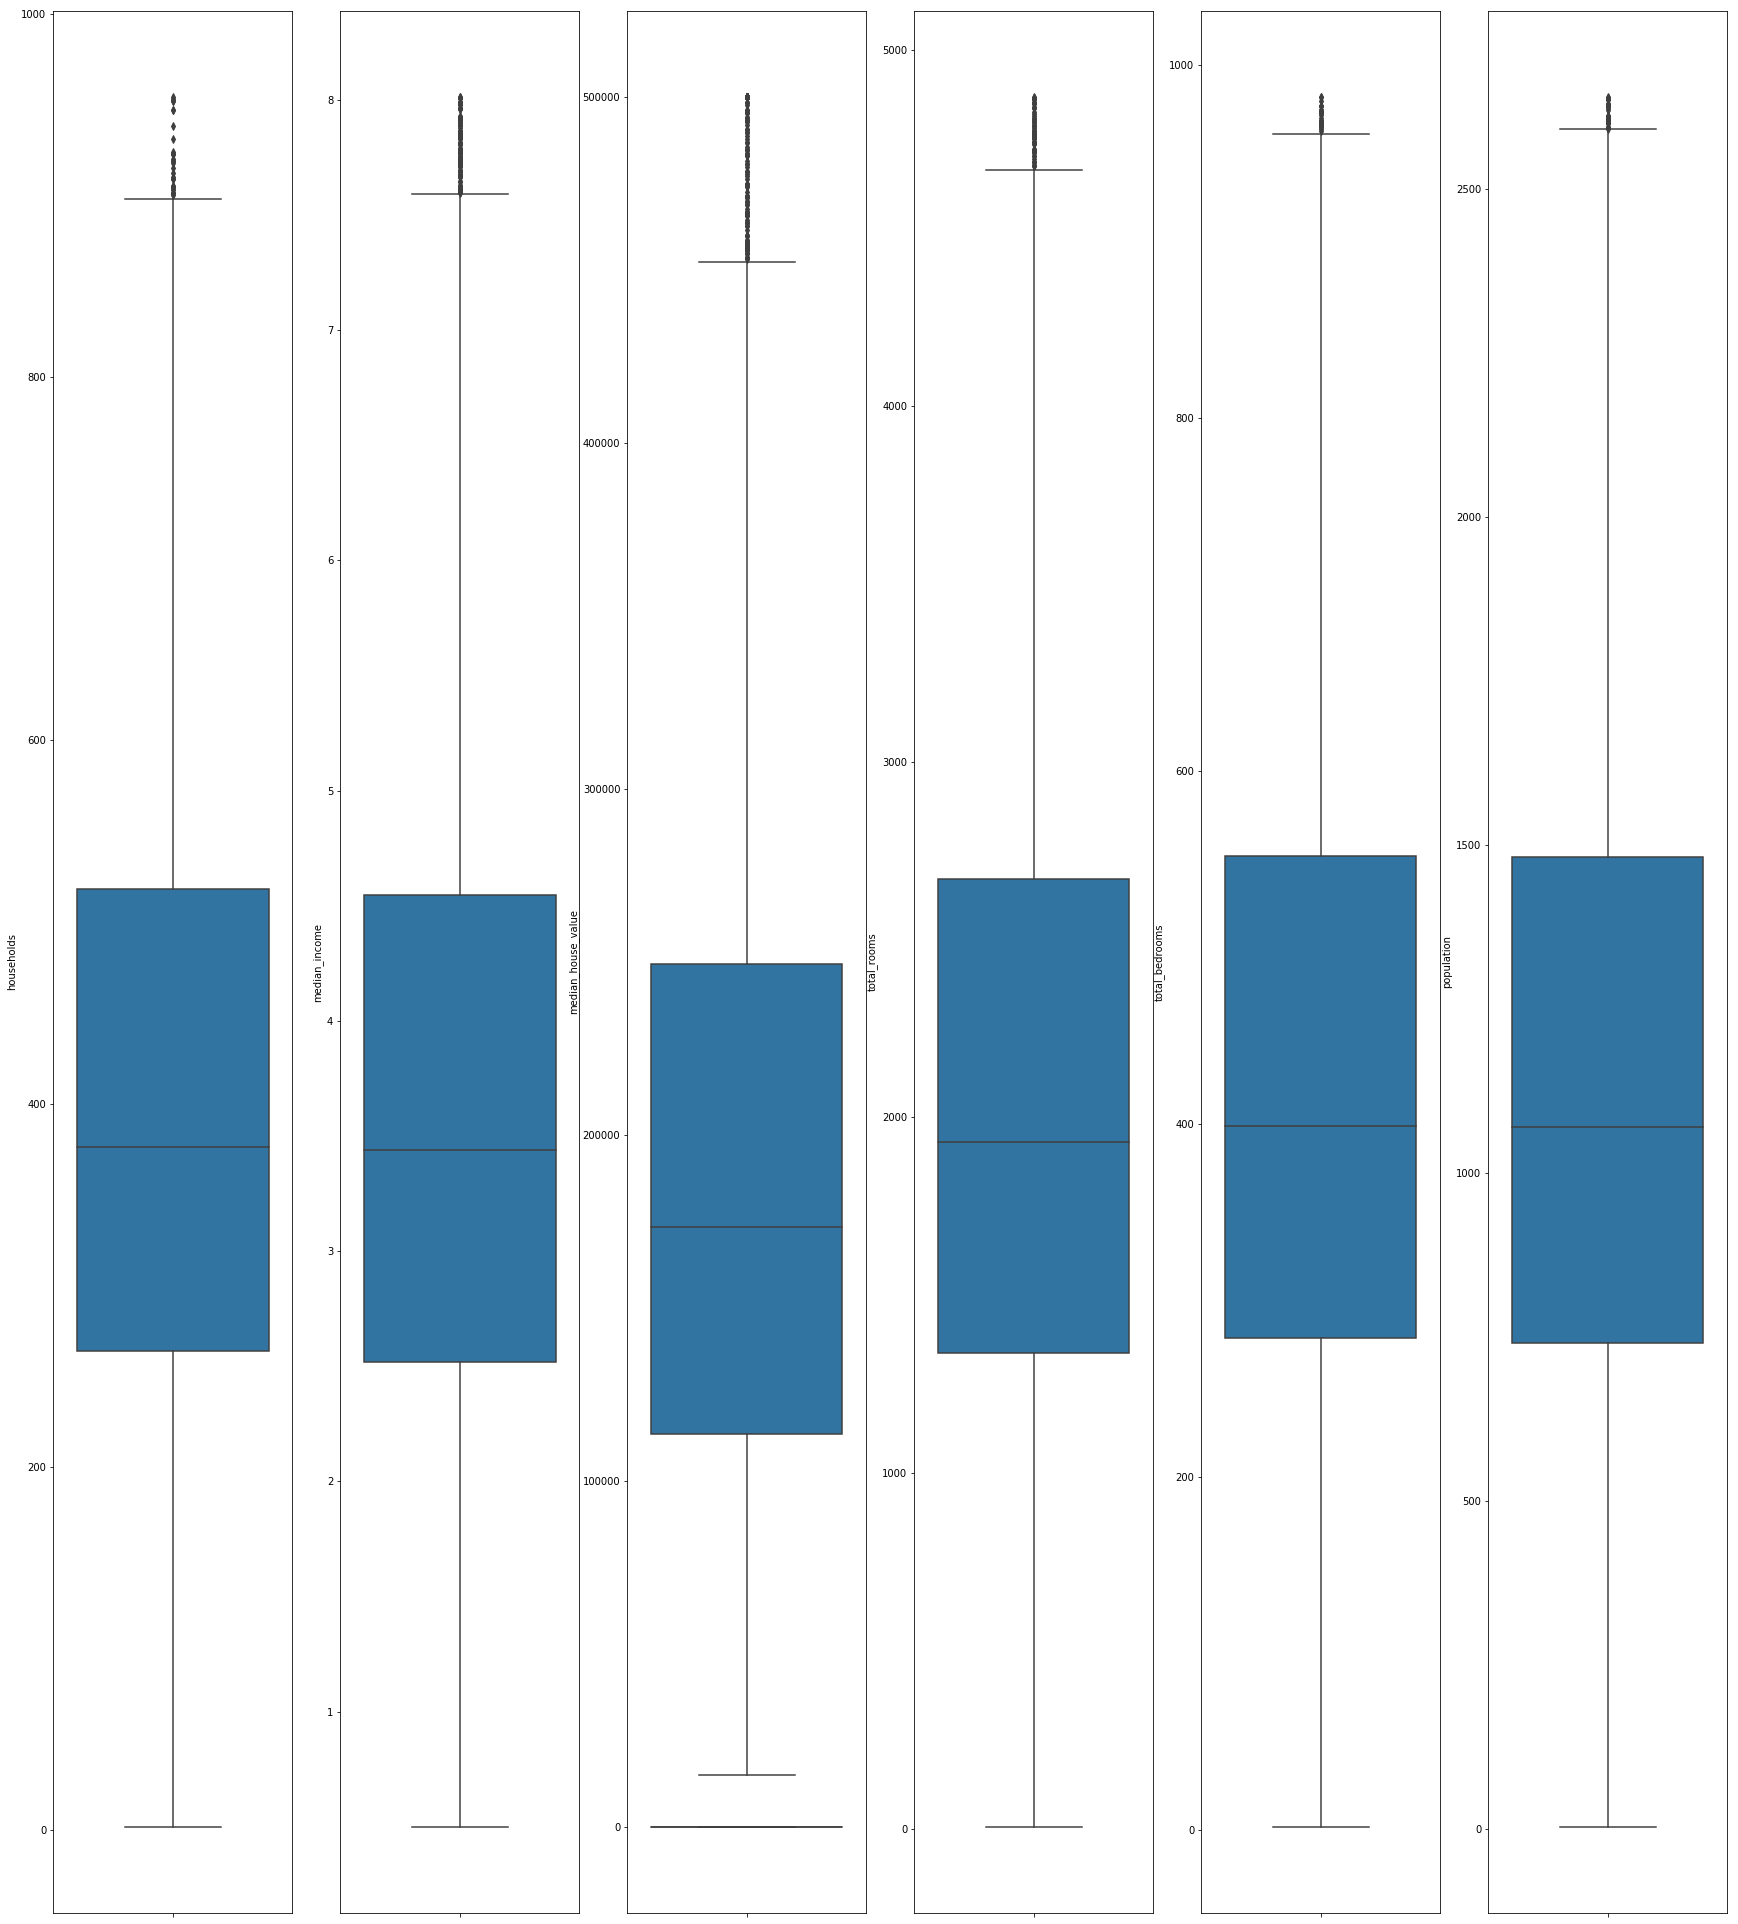

In [166]:
############## Now let us look at the distribution of data after outliers removal #################
#print(data2.shape[1])
fig, axes =plt.subplots(1,6,figsize=(30,35))
for i in range (2,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%6])

### Preliminary Observation :- 

1. We can clearly see the difference in two box plots, the one which we plotted before elimination of the outliers and one after outlier removal.
2. Box plot after removal of all outliers is much better than the previuous one and hence the our model will be more efficient on this data.
3. To have more compact data range, we can use rescaling method of the pre-processing and rescale the data in accordance with min and max value of respective feature. So next step will be to rescaling the data and check the effect on boxplots.    
(Source :- https://www.statisticshowto.datasciencecentral.com/normalized/)

In [167]:
print("--------------------- Before Rescaling -----------------------------------")
#print(data2.head())    
def norm(df, feature_name):
    #print(feature_name)
    temp_df = data2.copy()
    maxValue = data2[feature_name].max()
    minValue = data2[feature_name].min()
    temp_df[feature_name] = (data2[feature_name] - minValue) / (maxValue - minValue)
    #print(temp_df)
    return temp_df

Temp_df = pd.concat([X_total, T_total],  axis=1)
#Temp_df = pd.concat([X_total],  axis=1)

for i in range(len(Temp_df.columns.values)):
    print("Mean of ",Temp_df.columns.values[i],data2[Temp_df.columns.values[i]].mean())

print("---------------------- After Rescaling  -----------------------------------")
#print(data2.head())
for i in range(len(Temp_df.columns.values)):
    data2 = norm(data2,Temp_df.columns.values[i])
    print("Mean of ",Temp_df.columns.values[i],data2[Temp_df.columns.values[i]].mean())

#print(data2.head())
X_total = data2[['population','total_bedrooms','median_income','latitude','median_house_value','housing_median_age']].copy()
T_total = data2[['households']].copy()

--------------------- Before Rescaling -----------------------------------
Mean of  population 1129.6696171059175
Mean of  total_bedrooms 422.83888612630534
Mean of  median_income 3.6225495474887954
Mean of  latitude 35.67783888612623
Mean of  median_house_value 195934.54569865737
Mean of  housing_median_age 30.003281949278964
Mean of  households 395.77672799602186
---------------------- After Rescaling  -----------------------------------
Mean of  population 0.4272543106203691
Mean of  total_bedrooms 0.42942743482276013
Mean of  median_income 0.4157213765062192
Mean of  latitude 0.3334579050081096
Mean of  median_house_value 0.37306144242427464
Mean of  housing_median_age 0.5686918029270513
Mean of  households 0.41363101680254427


Now finally plotting box-plot against common scale as we have removed the outliers and then rescsaled each features with respect to the mean, max and min values of particular feature.

<Figure size 720x504 with 0 Axes>

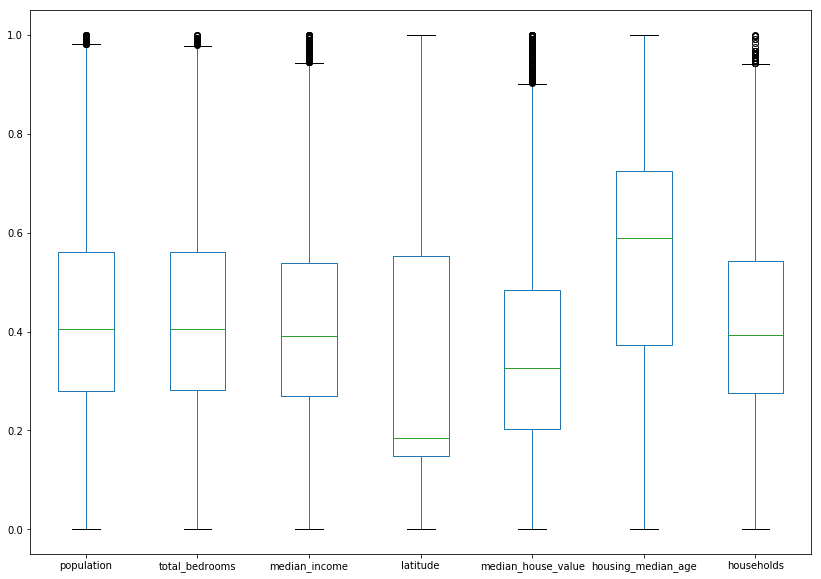

In [168]:
fig=plt.figure(figsize=(10, 7))
Temp_df1 = pd.concat([X_total, T_total],  axis=1)
Temp_df1.plot.box(figsize=(14,10))

## Preliminary Observations Summary :-

Final Box-plot shows that, now we have well distributed set of data which can be used for the training.

From the above observations,it can be seen that chosen data-set with  selected features are following linear trends. This trend is either directly or inversely proportional to the target variable. Hence we can proceed the the selected feature set in order to implement our model.

# III. Methods

## A. 5-fold Cross Validation:-
## Summary of cross validation

Cross Validation is used to evaluate the better machine learning algorithm. When we are mix-using multiple algorithms, we still need to know which model to choose. Here, remembe that we want a model that have good generalization.First we choose a model and train it with training dataset, we test it on the validation data. Comparing the validation error, we select the one that has the lowest validation error. Finally, we evaluate the model on testing data. Below is the detail algorithm of cross validation:-

1. Divide the dataset in 5 folds and take one part for testing.
2. From rest of the remaining data, hold out one for the validation part and then train the data with remaining 4 paramters.
3. Once the training is completed, test on validation data.
4. Perform these steps for all combinations of validation sets.
5. Choose best paramter from validation result and apply it on train data and the selected test data of that iteration.
6. Perform this stepsfor all training and testing partitioning.
7. Choose best parameter from it and then with that paramter perform training on data and test with the respective partiotioned data.
8. Once cross validation is completed, we can select best paramter and run it on X_train and X_test data.

## Correctness of Implementation

- Correctness of cross validation can be checked by picking up the weight paramter corresponding to the best accuracy or minimum error on testing/validation data.
- We will be using the parameters related to the best accuracy to train our model. The accuracy achieved on overall data with the use of this paramter will be maximum amongst the one we have selected while performing the cross validation.

## B. Nonlinear Regression:-
## Summary of Nonlinear Regression

Nonlinear regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables.

Feed forward neural networks have a rich representation. Thus, it can represent the linear model with single layer.

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/mlp_linear.png" width=400/>

Considering the multiple outputs, we formulated this in matrix: 

$$
\begin{align}
E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} - y_{nk})^2 \\
\\
Y &= Xl \cdot W
\end{align}
$$

The non linear model will have another layer or layers of neural network where in the inputs are fed, weighted sum is calculated and then softmax function is applied to find the probability of the class.

## Explaination of Code

NeuralNet class has all the required methods to implement functionality of the Non-linear regression. We will be using Nonlinear Regression on the regression data.

1. Standardizer Class:-
   - This class is used to standardize the data given to this particular class.
   - init() is a default constructor which will calculate mean and standard deviation of given data.
   - set_sigma function is used set the standard deviation explicitly as provided by the user.
   - standardize method is used to standardize the input data.
   - Unstandardize method is used to unstandardize the input data.
   

2. NeuralNet Class:-
    - init() is a default constructor used to initialize the required paramters for the implementation of the nonlinear regression. It is used to initialize paramters such as weights, learning rate, standard deviation and number of layers etc.
    - add_ones() is used to add bias in the feature vector, get_nlayers() initializes the number of hidden layers for the newural network, pack() and unpack() are mainly used to represent weight vector into particularl shape, so that it can be used for the manipulation.cp_weight() Contains the copy of original weights which are passed to the network.
    - forward() method is used for the forward processing of the neural network by taking dot product and also with the use of different activation functions such as tanh, RBF etc
    - backward() method propagates backward in the neural network in order to update weight parameters.
    - objectf() calculates the error function also it adds penalty value while returning  and same is used in the optimtargetf() which is responsible for the optimization of target function.
    - train() method is used for the training of the model with the help of train data. It initially pre-process the data by calling standardize method and then trains the model using scg and steepest.
    - use() function predicts the results using the weights calculated

## C.Nonlinear Logistic Regression:-
## Summary of Nonlinear Logistic Regression

Below mentioned softmax function is used in the softmax layer of linear logistic regression for the classification.

$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 


$$
w_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
w \leftarrow w + \alpha X^\top \Big(  T - g(X)\Big).
$$


## Explaination of Code

I selected the subset of feature set on the basis of correlation matrix. The target data is converted into identity matrix which is further passed to a softmax function. When the test data is passed to the use function, it standardizes the data and uses forward pass on it. we get the probabilities for each label from forward pass and then I used argmax to find out class labels. use function then returns the probability as well as the classes of predicted label. 

- init() is a default constructor used to initialize the required paramters for the implementation of the nonlinear logistic regression. It inherits the constructor of NeuralNet class.
- The forward() method takes the input X and the output is obtained from NeuralNet.forward() method. The softmax function is then applied to the output to return Z.

- The object() method calculates the error between the predicted and actual value. This is nothing but the liklihood function of that was used in the logistic regression.

- softmax() function is used to find out the occurance probability of each class.

- The train() method uses NeuralNet.train() method which is defined in an NeuralNet class.

- In use() method, forward method is called to find out class and probability specific to the test data.ThenI have used argmax to find out the class with highest probability/likelihood.

## Examination of correct implementation (NonlinearLogReg) with toy data

As this particular section requires a class defination of the Non-Linear Logistic Regression, I have implemented the same below. Kindly refer the same.


## IV. Implementation of nonlinear regression and nonlinear logistic regression on data

## Non-linear regression Code:-

In [169]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 
    
    

In [170]:
""" Neural Network """

import numpy as np
import matplotlib.pyplot as plt
from grad import scg, steepest
from copy import copy
from util import Standardizer


class NeuralNet:
    
    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y





In [171]:
#X_total = X_total.value
#T_total = T_total.value
print(type(X_total),X_total.shape)
print(type(T_total),T_total.shape)

<class 'pandas.core.frame.DataFrame'> (10055, 6)
<class 'pandas.core.frame.DataFrame'> (10055, 1)


## Examination of correct implementation:-

In [172]:
nn = NeuralNet([6,64,1])
nn.train(X_total.values, T_total.values) 
Y = nn.use(X_total)

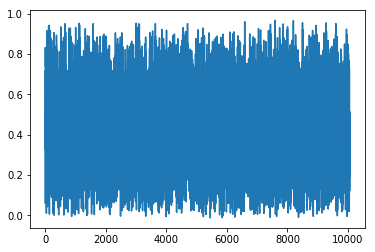

In [173]:
plt.plot(Y)

## Code for the cross-validation(Non-linear Regression):-

## Explaination of the Cross-Validation Code:-

In order to implement cross validation, I have followed the algorithm provided by the professor.My implementation consists of below steps:-
1. First, I have taken whole available data, to perform cross validation.
2. Then I divided, data into 5 folds using kFold of scikit-learn.
3. I hold out the X_test_cv which corresponds to the testing data for the first partitioning of trian data i.e X_train_cv.
4. Now, once I have the X_train_cv data, I need to divide this data into 4 partions - 3 for training and 1 for validation part. To do this, I again use KFold.
5. Now once I have the data with all splits, I performed the training and validation part by taking validation set as one out of 4 partition every time and calculated the accuracy after each iteration and retain the best accuracy.
6. With this best accuracy,I trained the model with whole X_train_cv data and tested X_test_cv data which were taken out in outer 'for' loop.
7. Then stored the final accuracy corrsponding to the first iteration in new array(test_err).
8. Performed steps 2 to 7 on each data set that I got from kfold.
9. Once all the above steps are completed, we can have the weight paramter which is giving maximum accuracy. Now with this parameter I have trained the 8000 data and tested the resuls on 2000 data.


In [174]:
import sklearn
from sklearn.model_selection import KFold
def cross_validation(xdata,ydata,nfolds,layers,La):
    errors = []
    testErrs = []
    xdata=xdata[0:1000]   
    i = 0
    if len(xdata)/nfolds >= 1 and len(ydata)/nfolds >= 1:
        kf = KFold(n_splits = nfolds)
    for train_index, test_index in kf.split(xdata):
        residual=[]
        para=[]    
        #print("TRAIN:", train_index, "TEST:", test_index)
        kf_val = KFold(n_splits = nfolds-1)
        
        x_temp = xdata[train_index]
        
        X_train_cv = np.array(xdata)[train_index]
        X_test_cv = np.array(xdata)[test_index]
            
        Y_train_cv = np.array(ydata)[train_index]
        Y_test_cv = np.array(ydata)[test_index]
        
        #print(x_temp.shape)
        #print(xdata[train_index])
        
        for train_index_val,validation_index in kf_val.split(x_temp):
            #print("TRAIN:", train_index_val, "Validation:", validation_index)
            #print(x_temp[train_index_val])
            
            X_train_new = np.array(x_temp)[train_index_val]
            X_val_new = np.array(x_temp)[validation_index]
            
            Y_train_new = np.array(ydata)[train_index_val]
            Y_val_new = np.array(ydata)[validation_index]
            
            n_col=np.array(xdata.shape)[1]
            for neurons in layers:
                #print(neurons)
                #print(X_train_new)
                #print(X_val_new)
                net = NeuralNet([n_col,neurons,1])
                net.train(X_train_new, Y_train_new,Lambda= La)
                #print(X_train_new.shape,Y_train_new.shape)
                classes = net.use(X_val_new)
                accuracy = 100 - np.mean(np.abs(Y_val_new - classes)) * 100
                residual.append(accuracy)
                para.append(neurons)
            #print(len(residual))
        print("Done with",i+1,"iteration on whole data")
        i+=1
        best_acc = max(residual)
        minInd = residual.index(best_acc)
        weight = para[minInd]
        errors.append([weight,best_acc])
        print(errors)
        print("--------------------------------------------------")
        net_cv = NeuralNet([n_col,weight,1])
        net_cv.train(X_train_cv, Y_train_cv,Lambda= La)
        cls = net_cv.use(X_test_cv)
        test_err = 100 - np.mean(np.abs(Y_test_cv - cls))*100
        rmse_error =np.sqrt(np.sum((Y_test_cv-cls)**2))
        print(rmse_error,test_err)
        testErrs.append([weight,test_err])
        fig,ax = plt.subplots()
        colors = cm.rainbow(np.linspace(0, 1, len(Y_val_new)))
        ax.scatter(Y_val_new,classes,c=colors)
        ax.plot([Y_val_new.min(),Y_val_new.max()],[Y_val_new.min(),Y_val_new.max()])
        ax.set_xlabel('Measured')
        ax.set_ylabel('Predicted')
        plt.show()
    
    #print(testErrs)
    
    return testErrs

## Presentation of CV results:-

Lambda: 0
Done with 1 iteration on whole data
[[7, 83.72035571802724]]
--------------------------------------------------
0.5116529264526803 97.54527481849688


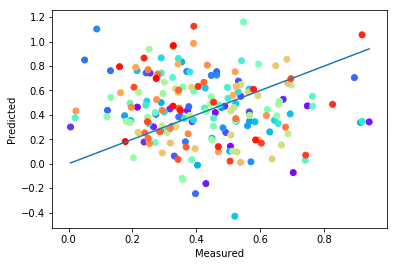

Done with 2 iteration on whole data
[[7, 83.72035571802724], [7, 83.45074271702542]]
--------------------------------------------------
0.5267690417036749 97.4328344579601


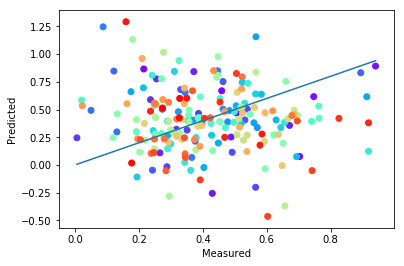

Done with 3 iteration on whole data
[[7, 83.72035571802724], [7, 83.45074271702542], [7, 87.40729219406602]]
--------------------------------------------------
0.5787103959906643 97.31589017152956


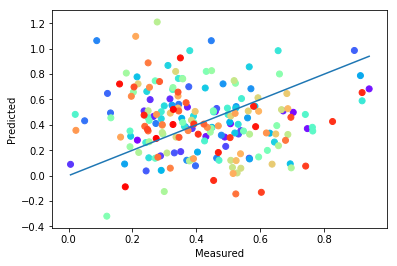

Done with 4 iteration on whole data
[[7, 83.72035571802724], [7, 83.45074271702542], [7, 87.40729219406602], [7, 92.45571908171895]]
--------------------------------------------------
0.5402859257649524 97.43214203740435


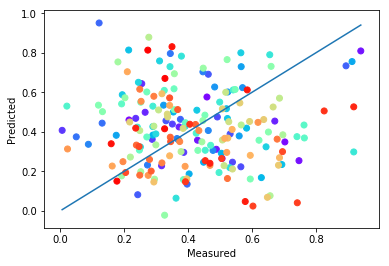

Done with 5 iteration on whole data
[[7, 83.72035571802724], [7, 83.45074271702542], [7, 87.40729219406602], [7, 92.45571908171895], [8, 97.75765693546012]]
--------------------------------------------------
0.4307664683028375 97.75890808390925


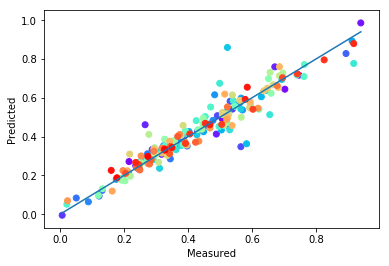

acc: [[7, 97.54527481849688], [7, 97.4328344579601], [7, 97.31589017152956], [7, 97.43214203740435], [8, 97.75890808390925]]
best_neuron: 8
best_lambda: 0
Lambda: 0.01
Done with 1 iteration on whole data
[[8, 85.13614749566773]]
--------------------------------------------------
0.7321288843727997 96.74266136634425


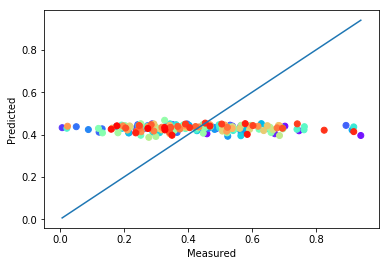

Done with 2 iteration on whole data
[[8, 85.13614749566773], [50, 84.37999236702784]]
--------------------------------------------------
0.6608704057751281 97.06745174293413


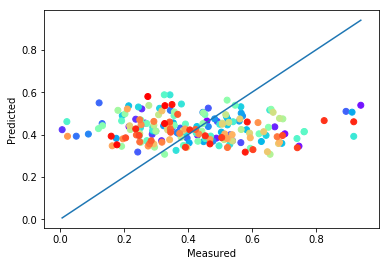

Done with 3 iteration on whole data
[[8, 85.13614749566773], [50, 84.37999236702784], [8, 89.26534540743498]]
--------------------------------------------------
0.5332373982282893 97.07979309306283


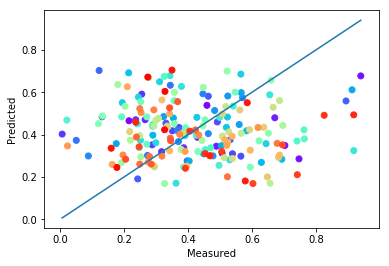

Done with 4 iteration on whole data
[[8, 85.13614749566773], [50, 84.37999236702784], [8, 89.26534540743498], [30, 94.0784527897574]]
--------------------------------------------------
0.7930026489526837 96.72390183166387


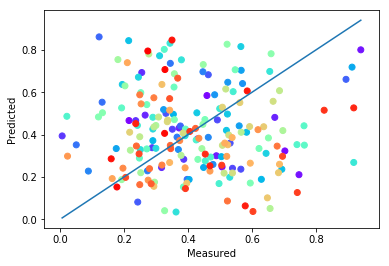

Done with 5 iteration on whole data
[[8, 85.13614749566773], [50, 84.37999236702784], [8, 89.26534540743498], [30, 94.0784527897574], [30, 97.05685360773889]]
--------------------------------------------------
0.5868788993999869 97.2155517362375


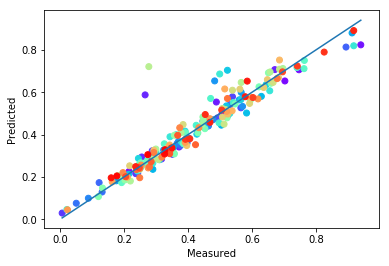

acc: [[8, 96.74266136634425], [50, 97.06745174293413], [8, 97.07979309306283], [30, 96.72390183166387], [30, 97.2155517362375]]
Lambda: 0.1
Done with 1 iteration on whole data
[[8, 85.1570530613198]]
--------------------------------------------------
0.9059167064204535 95.69512015147008


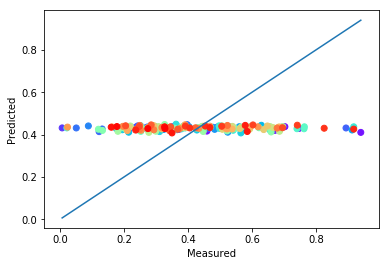

Done with 2 iteration on whole data
[[8, 85.1570530613198], [8, 84.80917634401001]]
--------------------------------------------------
0.8493978016431796 95.60654025624271


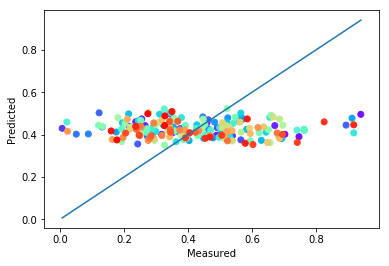

Done with 3 iteration on whole data
[[8, 85.1570530613198], [8, 84.80917634401001], [50, 88.27245308992337]]
--------------------------------------------------
0.6858566817475485 96.35632638609694


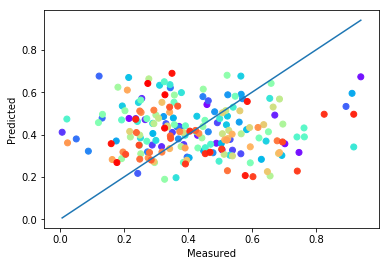

Done with 4 iteration on whole data
[[8, 85.1570530613198], [8, 84.80917634401001], [50, 88.27245308992337], [50, 93.45989300949937]]
--------------------------------------------------
0.8619556341156892 95.6284073465278


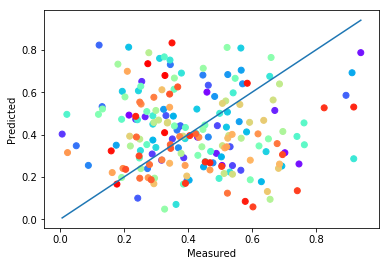

Done with 5 iteration on whole data
[[8, 85.1570530613198], [8, 84.80917634401001], [50, 88.27245308992337], [50, 93.45989300949937], [50, 96.65015377695526]]
--------------------------------------------------
0.6894089632267026 96.40296766318907


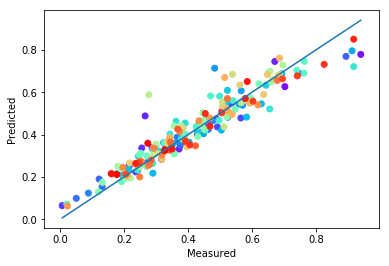

acc: [[8, 95.69512015147008], [8, 95.60654025624271], [50, 96.35632638609694], [50, 95.6284073465278], [50, 96.40296766318907]]
Lambda: 1
Done with 1 iteration on whole data
[[10, 85.14498202936666]]
--------------------------------------------------
2.5046006516598087 85.97285259394094


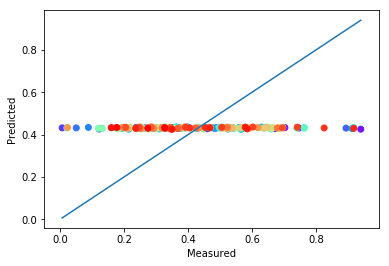

Done with 2 iteration on whole data
[[10, 85.14498202936666], [8, 85.14584449163522]]
--------------------------------------------------
2.770203361948357 84.16319174950806


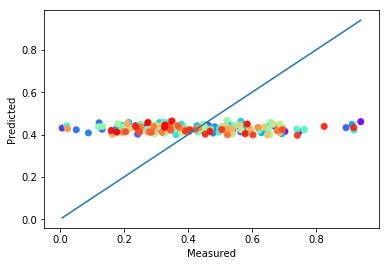

Done with 3 iteration on whole data
[[10, 85.14498202936666], [8, 85.14584449163522], [50, 86.13522356435446]]
--------------------------------------------------
2.1686443372156257 87.57470103725724


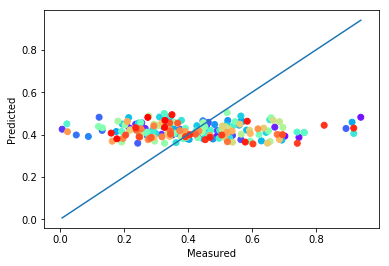

Done with 4 iteration on whole data
[[10, 85.14498202936666], [8, 85.14584449163522], [50, 86.13522356435446], [50, 87.61662220132392]]
--------------------------------------------------
2.095631284409184 88.0454519656283


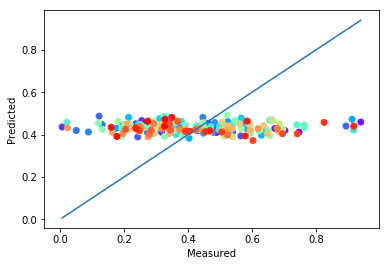

Done with 5 iteration on whole data
[[10, 85.14498202936666], [8, 85.14584449163522], [50, 86.13522356435446], [50, 87.61662220132392], [50, 88.01804041295824]]
--------------------------------------------------
2.2967000912422324 86.97532104000705


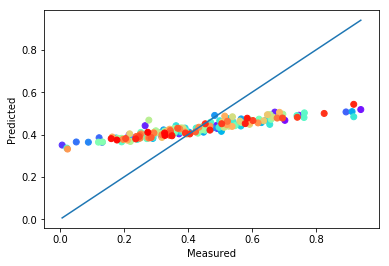

acc: [[10, 85.97285259394094], [8, 84.16319174950806], [50, 87.57470103725724], [50, 88.0454519656283], [50, 86.97532104000705]]
[[10, 85.97285259394094], [8, 84.16319174950806], [50, 87.57470103725724], [50, 88.0454519656283], [50, 86.97532104000705]]


In [175]:
layers = [7,10,30,8,50]
#cross = cross_validation(X_total.values,T_total.values,5,layers)
#print(cross)
Lambda = [0, 0.01, 0.1, 1]
max_acc = -1000
for i in Lambda:
    print('Lambda:',i)
    cross = cross_validation(X_total.values,T_total.values,5,layers,i)
    m = max(cross, key=lambda x: x[1])[1]
    print('acc:',cross)
    if max_acc < m:
        max_acc = m
        best_neuron = max(cross, key=lambda x: x[1])[0]
        best_lambda = i
        print('best_neuron:',best_neuron)
        print('best_lambda:',best_lambda)
print(cross)

In [176]:
print('Best Neuron:',best_neuron)
print('Best Lambda:',best_lambda)

Best Neuron: 8
Best Lambda: 0


## Implementation on regression data:-

In [177]:
X_train = X_total.iloc[0:8000].values
T_train = T_total.iloc[0:8000].values
print("Train Shape Check:", X_train.shape, T_train.shape)

X_test = X_total.iloc[8000:12000].values
T_test = T_total.iloc[8000:12000].values
print("Test Shape Check:", X_test.shape, T_test.shape)


n_col=np.array(X_train.shape)[1]
best_para = max(cross,key = lambda x:x[1])
final_train_nn = NeuralNet([n_col,best_para[0],1])
final_train_nn.train(X_train, T_train,Lambda=best_lambda ,ftracep=True)
predicted_values,Z = final_train_nn.use(X_test,retZ=True)
acc = 100 - np.mean(np.abs(T_test - predicted_values)) *100
print("\nAccuracy :-",acc)

Train Shape Check: (8000, 6) (8000, 1)
Test Shape Check: (2055, 6) (2055, 1)

Accuracy :- 97.92799456745003


## Plots for results:-

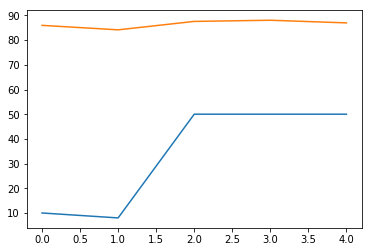

In [178]:
plt.plot(cross)

"\nplt.subplot(3,1,2)\nplt.plot(X_test[0:3],T_test[0:3],'o-')\nplt.xlim(0,1)\nplt.legend(('Testing'),loc='upper left')\nplt.xlabel('$x$')\nplt.ylabel('Actual and Predicted $f(x)$')\n\nplt.subplot(3,1,3)\nplt.plot(X_test[0:3],predicted_values[0:3],'o-')\nplt.xlim(0,1)\nplt.legend(('Model'))\nplt.xlabel('$x$')\nplt.ylabel('Actual and Predicted $f(x)$')\n"

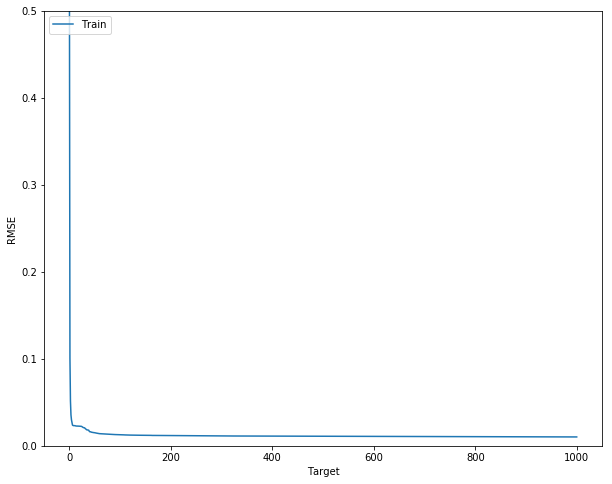

In [179]:
plt.figure(figsize=(10,8))
plt.plot(final_train_nn.ftrace)
plt.ylim(0,0.5)
plt.xlabel('Target')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

'''
plt.subplot(3,1,2)
plt.plot(X_test[0:3],T_test[0:3],'o-')
plt.xlim(0,1)
plt.legend(('Testing'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(X_test[0:3],predicted_values[0:3],'o-')
plt.xlim(0,1)
plt.legend(('Model'))
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')
'''

#plt.subplot(3,1,3)
#plt.plot(X_train[:3], Z[1][:3])
#plt.ylim(-1.1,1.1)
#plt.xlabel('$x$')
#plt.ylabel('Hidden Unit Outputs ($z$)');

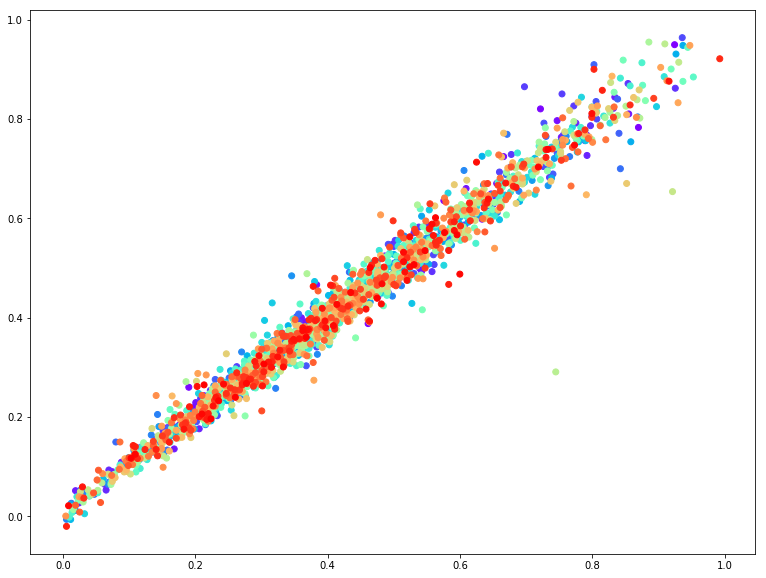

In [180]:
import matplotlib.cm as cm
plt.figure(figsize=(13,10))
colors = cm.rainbow(np.linspace(0, 1, len(T_test)))
plt.scatter(T_test, predicted_values,c= colors)
plt.show()

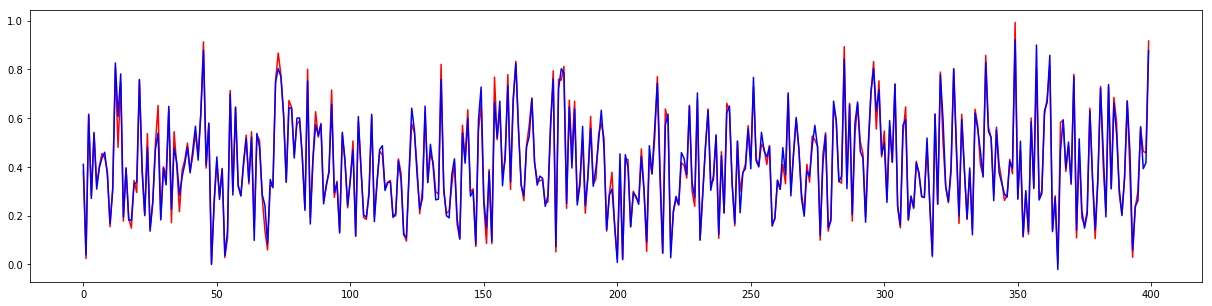

In [181]:
plt.figure(figsize=(21,5))
plt.plot(T_test[1600:2000],'-r')
plt.plot(predicted_values[1600:2000],'-b')

RMS error between actual and predicted taget for train data is :-  1.3970508848007983


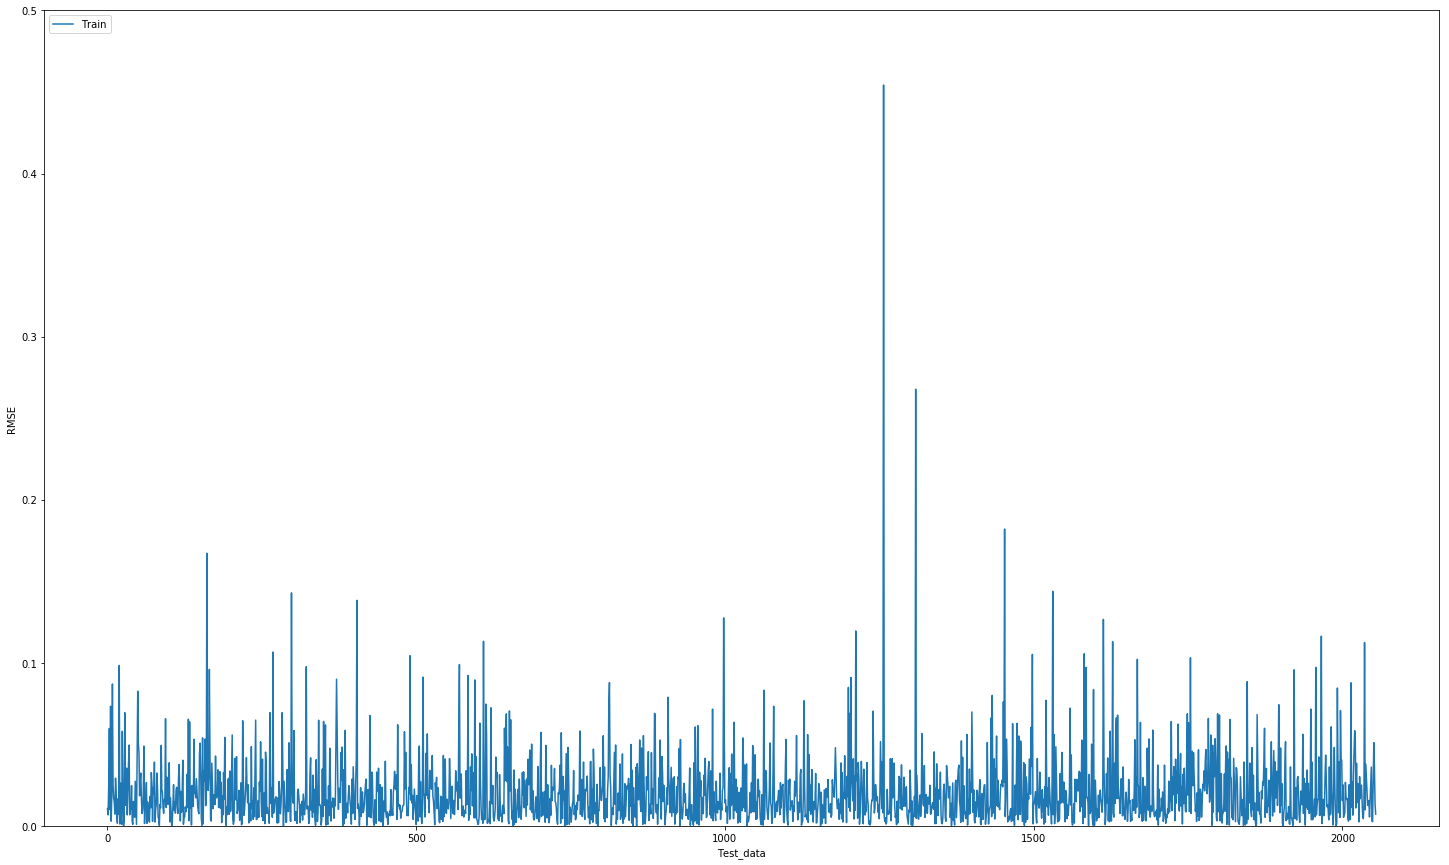

In [182]:
rmse_error_2 =np.sqrt((T_test-predicted_values)**2)
plt.figure(figsize=(25,15))
plt.plot(rmse_error_2)
plt.ylim(0,0.5)
plt.xlabel("Test_data")
plt.ylabel("RMSE")
plt.legend(('Train','Test'),loc='upper left')

rmse_error =np.sqrt(np.sum((T_test-predicted_values)**2))
print("RMS error between actual and predicted taget for train data is :- ",rmse_error)

## Nonlinear Logistic Regression

In [183]:
data2 = pd.read_csv("avocado.csv")
data2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [184]:
# Pre Processing the data.. Splitting the column Date and taking out only year from it ########
################# 1. Checking for thr null Values ################
print(data2.isnull().sum())
################# 2. Dropping unwanted column Unnamed ################
data2.rename( columns={'Unnamed: 0':'new column name'}, inplace=True )
data2 = data2.drop('new column name', axis=1)
################# 3. Renaming the columns so that visualization will be more convinient ################
data2 = data2.rename(index=str, columns={"4046" : "Small_Hass", "4225" : "Large_Hass", "4770" : "XLarge_Hass"})
data2.head()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


,Date,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [185]:
########### 4.Separating out Year from  Date column ########### 
data2
new_data = data2["Date"].str.split("-", n = 2, expand = True) 
data2["Year"] = new_data[0]
data2.drop(columns=["Date"], inplace = True)
data2.head()
#new_data

,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015


### Note :-
Aftere observing the data,it is found that there is overlapping between data, e.g there is a data of California as well as SanFrancisco. We need to remove the overlapping data to have correct visualization. Hence removing overlapping data by dropping certain rows.

In [186]:
############ 5. Removing the overlapping data. #############
regionsToDrop = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 
                   'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
data2 = data2[~data2.region.isin(regionsToDrop)] # Taking compliment of data not present in regionsToDrop
data2.head()

,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015


## 3. Visualization of the data


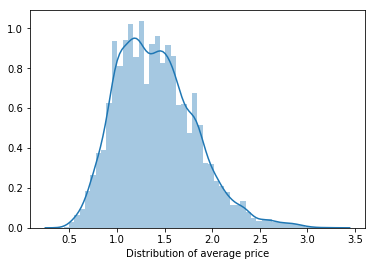

In [187]:
### Plotting the distribution of the average price, in order to find rhe average price of Avocado.###

sns.distplot(data2["AveragePrice"],axlabel="Distribution of average price")

### Observation :- 

From the above distribution graph it can be interpreted that the average price of avocado falls in between 1.0 and 1.75.

Taking 5 cities and checking the pattern in which the prices are increased. To do that plotting the line graph for all years with average price.

Top 5 Contries:- 
----------------
HartfordSpringfield
SanFrancisco
Philadelphia
Sacramento
Charlotte


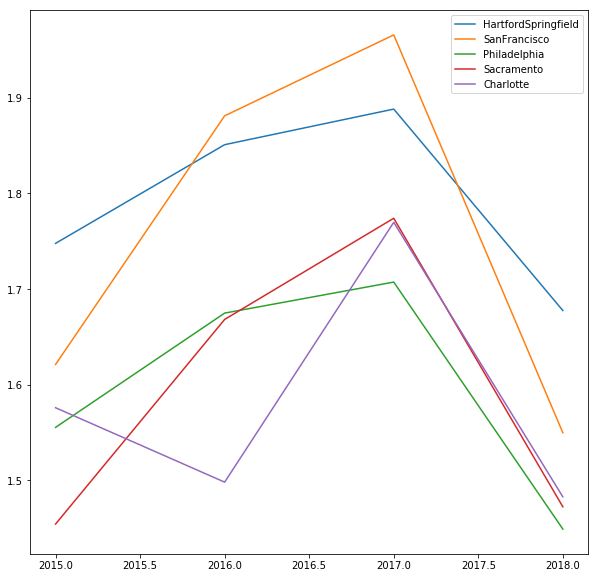

In [188]:
############ Average Price of Avocado According to the Year for top 5 highest average prices ##########
area_list=list(data2.region.unique())
unique_years = list(data2.year.unique())
area_averageprice_ratio=[]
for i in area_list:
    x=data2[data2['region']==i]
    area_averageprice_rate=sum(x['AveragePrice'])/len(x)
    area_averageprice_ratio.append(area_averageprice_rate)
#area_averageprice_ratio = sorted(area_averageprice_ratio,reverse=True)
#print(area_averageprice_ratio)
df=pd.DataFrame({'area_list':area_list,'area_averageprice_ratio':area_averageprice_ratio})
new_index=df['area_averageprice_ratio'].sort_values(ascending=False).index.values
sorted_data=df.reindex(new_index)
#print(sorted_data.area_list[int(sorted_data.index[0])])
plt.figure(figsize=(10,10))
test1=[]
print("Top 5 Contries:- ")
print("----------------")
for i in range(0,5):
    avg_column_cali= data2[data2["region"]==sorted_data.area_list[int(sorted_data.index[i])]]
    print(sorted_data.area_list[int(sorted_data.index[i])])
    #avg_column_cali = data[data["region"]==area_list[i]]                              
    #print(avg_column_cali)
    avg_per_year_cali = avg_column_cali.groupby('year').aggregate('mean')
    #data.year
    #print(avg_per_year_cali.AveragePrice)
    test1.append(sorted_data.area_list[sorted_data.index[i]])
    plt.plot(unique_years,avg_per_year_cali.AveragePrice)
    plt.legend(sorted_data.area_list[int(sorted_data.index[i])])
plt.legend(test1)
plt.show()

### Observation:-

1. Above Graph shows average prices during each year.
(Here I have taken the graph of 5 cities whose avergare price cost of avocado was maximum)
2. From the above graph it can be inferred that the avocado prices were increased substantially in year 2017.
3. This price rise was mainly due to the low supply and high demand.
(Source :- https://money.cnn.com/2017/09/09/news/economy/avocado-prices-soar/index.html)
4. Again in the 2018, the prices of Avocado droped below.


Text(0.5, 1.0, 'Average Price/States')

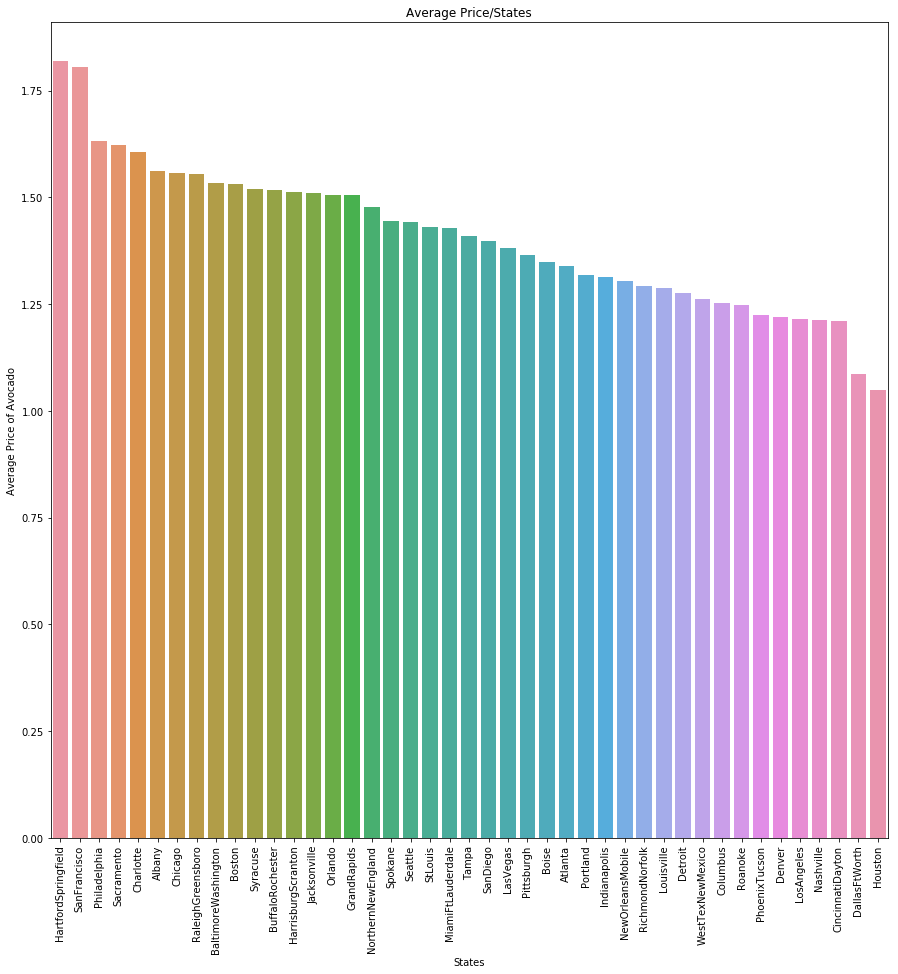

In [189]:
######## Lets Analyze the distribution of Avergae Price over all states #############
plt.figure(figsize=(15,15))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_averageprice_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Average Price of Avocado')
plt.title('Average Price/States')

- Above graph show the distribution of average prices of all states.
- HartfordSpringfield, SanFrancisco, Philadelphia, Sacramento, Charlotte are the top five cities in which average price was higher(considering all 4 years) and average price of Avocado was minimum in Houston.

Now lets check which type of avocado was more expensive and might be the cause for increase in average price. Below plotted bar graph will give more information of the same.

Years :-  [2015, 2016, 2017, 2018]
Conventional Avocados Average Price :-  [1.0821109123434725, 1.1050715563506255, 1.2963624396665214, 1.1306007751937983]
Organic Avocados Average Price :-  [1.6708411633109654, 1.5707558139534832, 1.7429995608256486, 1.568488372093023]


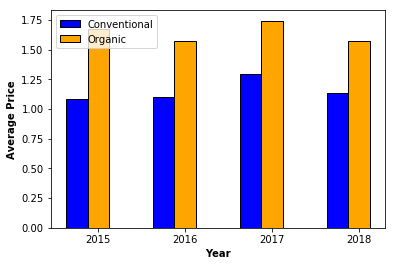

In [190]:
################### Plotting bar graph to find categorial distribution of average price ###################

######### Storing data of each year in different lists ##########
data_15=data2[data2.year==2015]
data_16=data2[data2.year==2016]
data_17=data2[data2.year==2017]
data_18=data2[data2.year==2018]
years = list(data2.year.unique())
print("Years :- ",years)
data_15_con = data_15[data_15.type =='conventional'].AveragePrice.mean()
conventional_data = [float(data_15[data_15.type =='conventional'].AveragePrice.mean()),float(data_16[data_16.type =='conventional'].AveragePrice.mean()),float(data_17[data_17.type =='conventional'].AveragePrice.mean()),float(data_18[data_18.type =='conventional'].AveragePrice.mean())]
print("Conventional Avocados Average Price :- ",conventional_data)
organic_data = [float(data_15[data_15.type =='organic'].AveragePrice.mean()),float(data_16[data_16.type =='organic'].AveragePrice.mean()),float(data_17[data_17.type =='organic'].AveragePrice.mean()),float(data_18[data_18.type =='organic'].AveragePrice.mean())]
print("Organic Avocados Average Price :- ",organic_data)
###########################################
barWidth = 0.25
r1 = np.arange(len(conventional_data))
r2 = [x + barWidth for x in r1]
plt.bar(r1, conventional_data, color='blue', width=barWidth, edgecolor='black', label='Conventional')
plt.bar(r2, organic_data, color='orange', width=barWidth, edgecolor='black', label='Organic')
###
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(conventional_data))], years)
plt.ylabel('Average Price', fontweight='bold')
###
plt.legend()
plt.show()

### Observation :-

1. This bar graph show clearly that there was increase in the price of avocado in both categories(Conventioanl and Organic) in 2017 and this was maximum as compared to any other year.

2. Above comparision between average price of conventional and organic avocado also shows that avergae price of organic avocados were alwasy higher than the conventional and price difference between organic and conventional were maximum in 2015.

To check th effect of price rise on the consumption of the avocado, plotting total volume consumed 

Most consumed cities :-
---------------------
LosAngeles
DallasFtWorth
Houston
PhoenixTucson
WestTexNewMexico


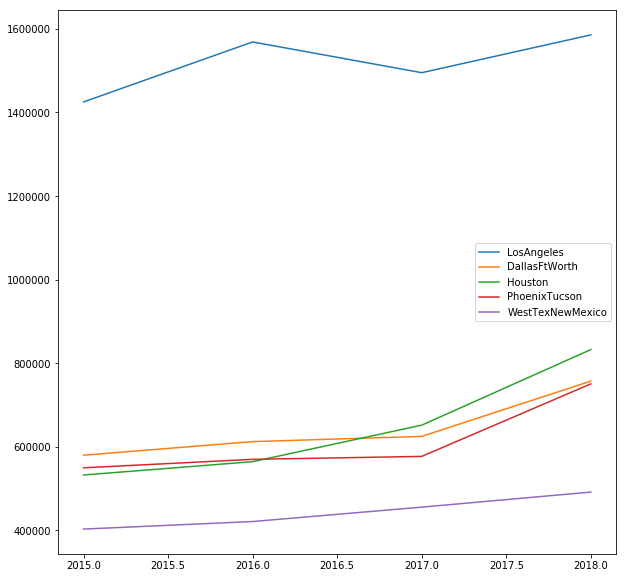

In [ ]:
####### Distribution of total consumption of avocado in 5 states #############
data2 = data2.rename(index=str, columns={"Total Volume" : "TotalVolume"})
area_list=list(data2.region.unique())
unique_years = list(data2.year.unique())
area_averageprice_ratio=[]
for i in area_list:
    x=data2[data2['region']==i]
    area_averageprice_rate=sum(x['TotalVolume'])/len(x)
    area_averageprice_ratio.append(area_averageprice_rate)
#area_averageprice_ratio = sorted(area_averageprice_ratio,reverse=True)
#print(area_averageprice_ratio)
df=pd.DataFrame({'area_list':area_list,'area_average_volume_ratio':area_averageprice_ratio})
new_index=df['area_average_volume_ratio'].sort_values(ascending=False).index.values
sorted_data=df.reindex(new_index)
plt.figure(figsize=(10,10))
test = []
print("Most consumed cities :-")
print("---------------------")
#print(sorted_data.area_list[int(sorted_data.index[0])])
for i in range(0,5):
    avg_column_cali= data2[data2["region"]==sorted_data.area_list[int(sorted_data.index[i])]]
    print(sorted_data.area_list[int(sorted_data.index[i])])
    #avg_column_cali = data[data["region"]==area_list[i]]                              
    #print(avg_column_cali)
    avg_per_year_cali = avg_column_cali.groupby('year').aggregate('mean')
    #data.year
    #print(avg_per_year_cali.AveragePrice)
    #print(avg_per_year_cali.TotalVolume)
    test.append(sorted_data.area_list[sorted_data.index[i]])
    plt.plot(unique_years,avg_per_year_cali.TotalVolume)
#print(test)
plt.legend(test)
plt.show()

### Observation :-

From the above graph it can be concluded that the total volume consumed were maximum in LosAngeles. Although we got the top city in which the consumption of avocado were maximum, plotting the distribution graph of volume consumed in each state to have  more undersatinding about the distribution in each state.

Text(0.5, 1.0, 'Average Volume Consume States')

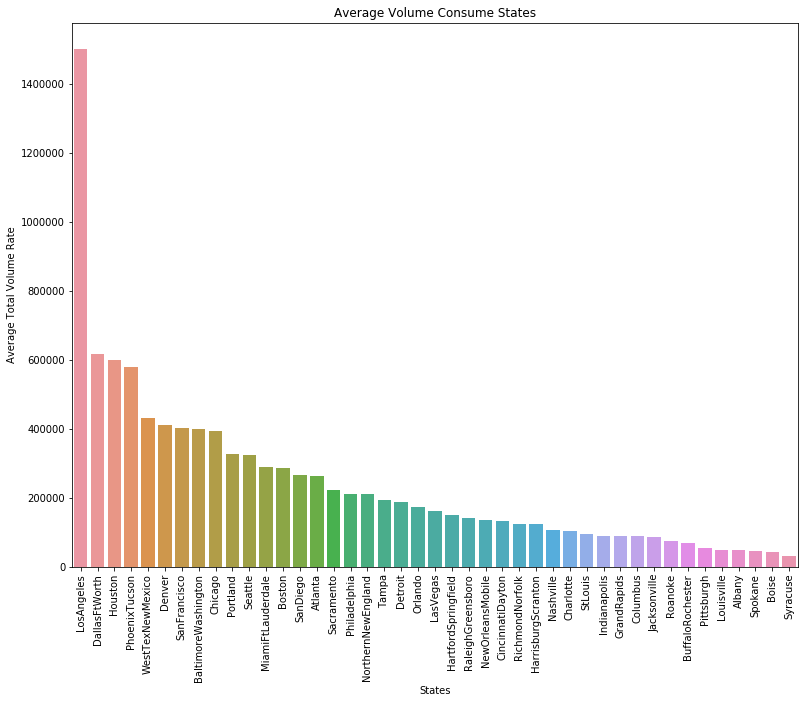

In [ ]:
######## Lets Analyze the distribution of Avergae volume consumed over all states #############
plt.figure(figsize=(13,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_average_volume_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Average Total Volume Rate')
plt.title('Average Volume Consume States')

### Observation :-

- Above Graph shows the distribution of the total volume over all states. From above graph it can be concluded that the total volume consumed was very large in Los Angeles than any other states.
- Now lets analysize the overall volume distribution of LosAngeles in terms of 'Conventional' and 'Organic', to see which type of Avocados are getting sold more.

conventional    169
organic         152
Name: type, dtype: int64


Text(0.5, 1.0, 'Type of Distribution')

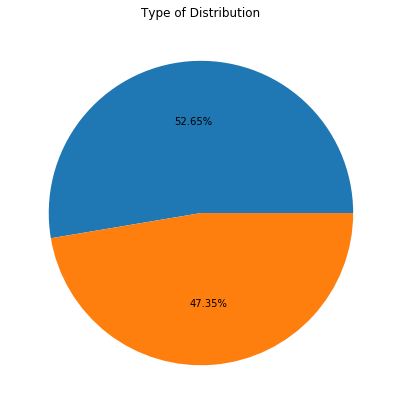

In [ ]:
############### Plotting bar graph bar to see the categorial distribution in LosAngeles #################
data_LA = data2[(data2["region"]=="LosAngeles")& (data2.AveragePrice<2)]
#print(data_LA)
print(data_LA.type.value_counts())
plt.figure(figsize=(7,7))
plt.pie(data_LA.type.value_counts(),autopct='%1.2f%%')
plt.title('Type of Distribution')

### Observation :-

- People in LosAngeles prefers conventional avocados over organic.

Now lets find the relation between different features of avocado using Heat Map.

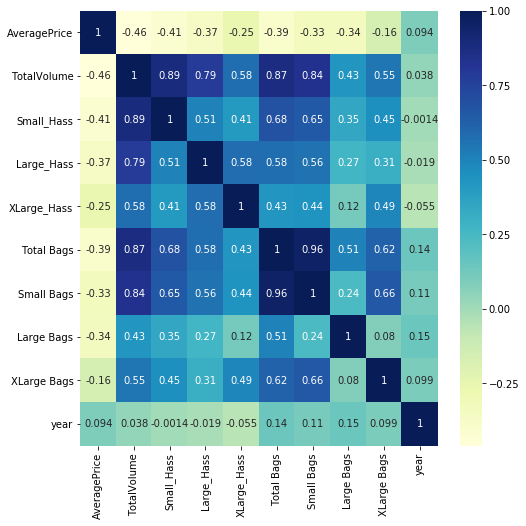

In [ ]:
####### To chek the relation between two features, plotting heatmap ############
heat_map=plt.subplots(figsize=(8,8))
heat_map = sns.heatmap(data2.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Observation :-

- Total Bags of Avocados sold were closely related more to small bags, XLarge bags and Large bags respectively.
- Also similar observation can be seen with respect to total volume consumed and small bags, XLarge bags and Large bags.
- Hence cutomers preferences can be concluded as :-  __small bags > XLarge bags > Large bags__

## Preliminary Observation

From above all visualizations below things can be concluded :-

1. Average price of th Avocado was maximum in 2017. The prices were drastically increased from 2016 to 2017. In 2018 average prices of Avocado again droped.
2. Average price were maximum in 'HartfordSpringfield' throght out the period and minimum in Houston.
3. It is also observed from the grouped bar graph that average price of organic avocado were more than the conventional type avocado. This is true as the cost required for manufacture of organic is more than the conventional and hence the average cost price of organic will be more than the conventional.
(Source :- https://www.foxnews.com/food-drink/10-reasons-organic-food-is-so-expensive)
4. From the Average volume ratio graph, it can be inferred that the average volume of avocado consumed by the customers is maximum in Los Angeles. Now in order check whether customer prefers organic or conventional avocado, I plotted the pie chart of distribution of average volume consumed over avocado type for Los Angeles and found that customer prefers conventional avocado more than the organic avocados.
5. Possibly reason why customer prefers conventional over organic maybe the avergae price difference between these two types.
6. Customers prefers to buy small bags more than Xlarge and large bags.

## Preprocessing of the data for the classification:-

1. Performing sampling to get the 12000 randomly from the whole dataset. In order to perform the classification, I am going to use the same sampled dataset.
2. Once the sampling is done, I will check for the outliers present in the data, in order to remove the same.
3. To check the presence of outliers, plotting boxplots with selected features.

(12000, 4)
Features considered for box-plot :- 
1 . AveragePrice
2 . TotalVolume
3 . Total Bags


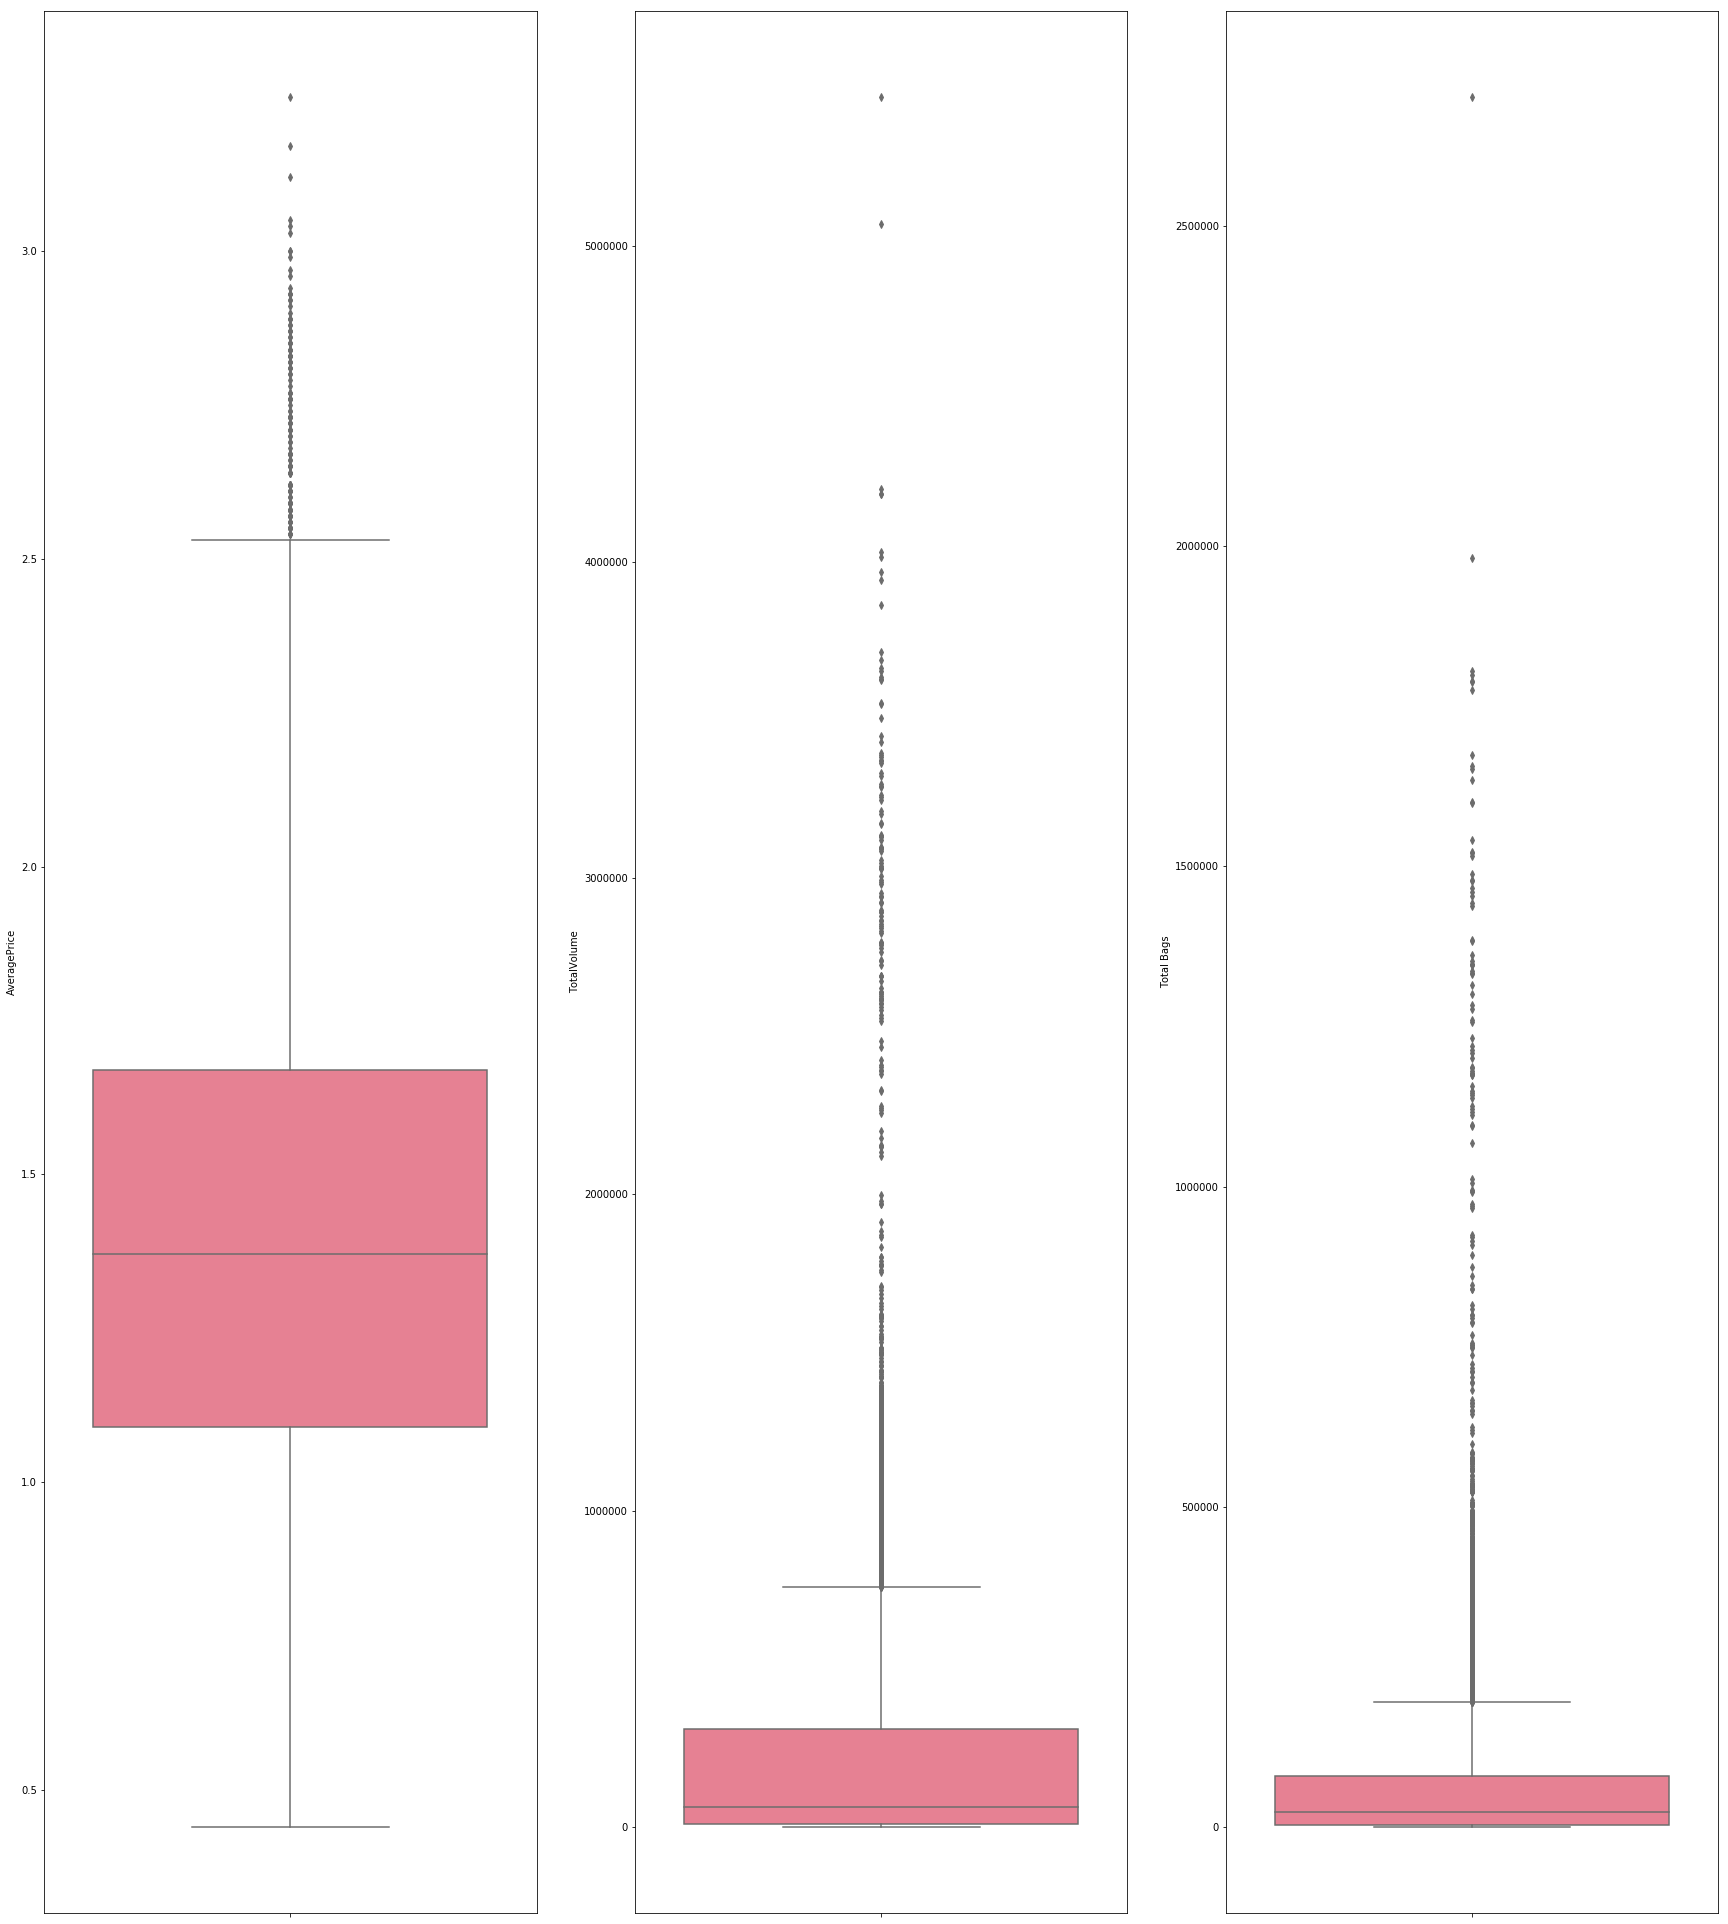

In [ ]:
################# Sampling out 12000 data points and plotting box-plots on it ##################
data2 = data2[['AveragePrice','TotalVolume','Total Bags','type']].copy()
data2 = data2.sample(12000)
print(data2.shape)
print("Features considered for box-plot :- ")
fig, axes =plt.subplots(1,3,figsize=(30,35))
for i in range (0,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(i+1,".",data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%3],palette = "husl")

In [ ]:
######################### Function to remove outliers ##########################
def findOutliers(dataframe,column):
    #column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    print("Description of :-",column,"\n --------------------------------")
    print(des)
    cummulative = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Quantile1 = des[cummulative['25']]
    Quantile3 = des[cummulative['75']]
    IQR = Quantile3-Quantile1
    lowerBound = Quantile1-1.5*IQR
    upperBound = Quantile3+1.5*IQR
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]
    print("-------------------Removing outliers -----------------")
    #remove the outliers from the dataframe
    outlier = dataframe[~dataframe[column].isin(data[column])]
    return outlier

def norm(df, feature_name):
    #print(feature_name)
    temp_df = data2.copy()
    maxValue = data2[feature_name].max()
    minValue = data2[feature_name].min()
    temp_df[feature_name] = (data2[feature_name] - minValue) / (maxValue - minValue)
    #print(temp_df)
    return temp_df

### Preliminary Observation :- 

- As there are outliers present in the data, we need to remove the same before proceeding with the classification. 
- The above-mentioned method performs the task of removing outliers by calculating quantile boundaries for each column.
- Next step will be to convert the categorical target variable 'type' into -1,1. This is performed so that the same can be used while calculating the weight parameter in case of pocket algorithm of classification.

In [ ]:
data2['type'].replace(['conventional','organic'],[0,1],inplace=True)
print(data2.head())

       AveragePrice  TotalVolume  Total Bags  type
575            0.74   1054849.97   119463.87     0
15812          2.55      1421.74      809.99     1
439            1.24    797060.27    98743.44     0
12074          1.73     22013.07    11515.65     1
13942          1.36      9008.52     3191.72     1


In [ ]:
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"AveragePrice")
print(data2.shape)
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"TotalVolume")
data2 = findOutliers(data2,"TotalVolume")
data2 = findOutliers(data2,"TotalVolume")
print(data2.shape)
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"Total Bags")
print(data2.shape)

Description of :- AveragePrice 
 --------------------------------
count    12000.000000
mean         1.406892
std          0.414286
min          0.440000
25%          1.090000
50%          1.370000
75%          1.670000
max          3.250000
Name: AveragePrice, dtype: float64
-------------------Removing outliers -----------------
(11846, 4)
Description of :- TotalVolume 
 --------------------------------
count    1.184600e+04
mean     2.435595e+05
std      4.229974e+05
min      8.456000e+01
25%      8.346798e+03
50%      6.816786e+04
75%      3.121697e+05
max      5.470227e+06
Name: TotalVolume, dtype: float64
-------------------Removing outliers -----------------
Description of :- TotalVolume 
 --------------------------------
count     10840.0000
mean     146280.7510
std      192524.9028
min          84.5600
25%        7516.7625
50%       35656.0750
75%      235564.3100
max      767074.6400
Name: TotalVolume, dtype: float64
-------------------Removing outliers -----------------
Descr

Features considered for box-plot :- 
1 . AveragePrice
2 . TotalVolume
3 . Total Bags


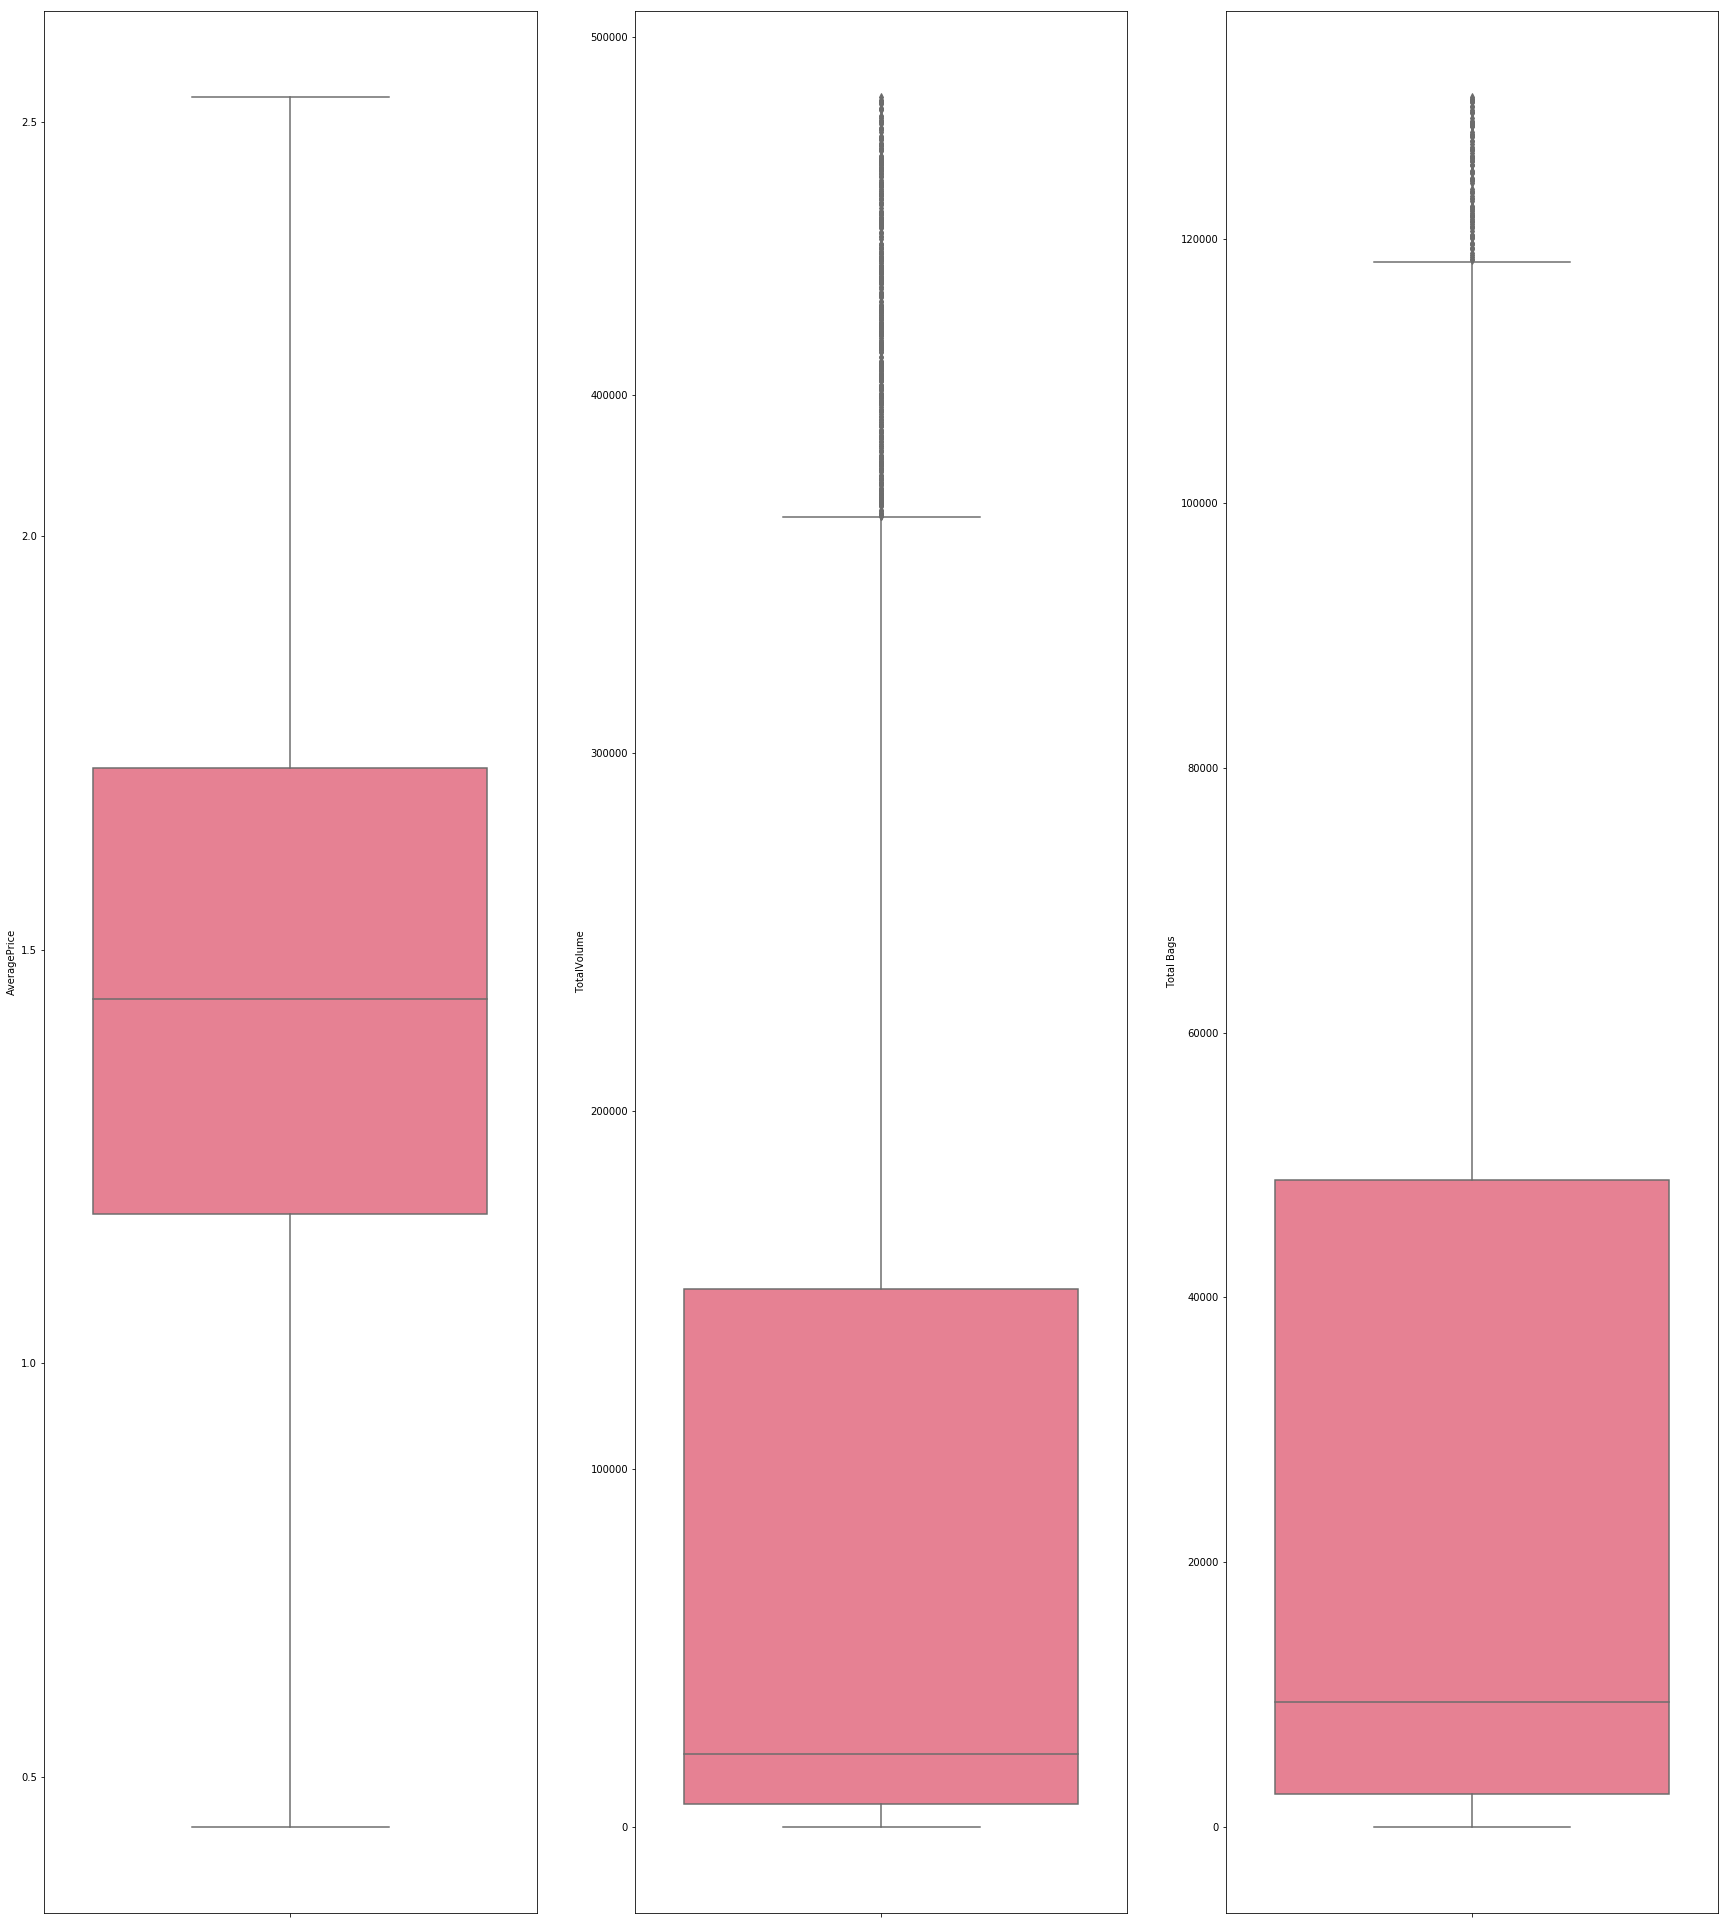

In [ ]:
################# Representation of features after removal of the outliers ##################
print("Features considered for box-plot :- ")
fig, axes =plt.subplots(1,3,figsize=(30,35))
for i in range (0,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(i+1,".",data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%3],palette = "husl")

### Preliminary Observation :- 

1. We can clearly see the difference in two box plots, the one which we plotted before elimination of the outliers and one after outlier removal.
2. Box plot after removal of all outliers is much better than the previous one and hence our model will be more efficient on this data.
3. To have a more compact data range, we can use the rescaling method of the pre-processing and rescale the data in accordance with min and max value of the respective feature. So the next step will be to rescaling the data and check the effect on boxplots.    
(Source :- https://www.statisticshowto.datasciencecentral.com/normalized/)

## Non-linear Logistic Regression Code:-

In [ ]:
X_total_class = data2[['AveragePrice','TotalVolume','Total Bags']].copy()
T_total_class = data2[['type']].copy()
T_total_class.head()
T_total_class.groupby(['type']).size().reset_index(name='counts')

,type,counts
0,0,3663
1,1,5838


In [ ]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self,nunits)

   
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f)) 
    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t,z = NeuralNet.forward(self,X)
        return self.softmax(t),z

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        epsilon=1e-12
        Y = np.clip(Y, epsilon, 1. - epsilon)
        N = Y.shape[0]
        ce = -np.sum(np.sum(T*np.log(Y+1e-9)))
        return ce

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        NeuralNet.train(self,X,T)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Xs = X
        classes, probabilities = self.forward(Xs)
        if self.stdT is None:
            classes = self.stdT.unstandardize(classes)
        return np.argmax(classes,1),probabilities,classes


## Examination of correct implementation (NonlinearLogReg) with toy data

(-3, 7)

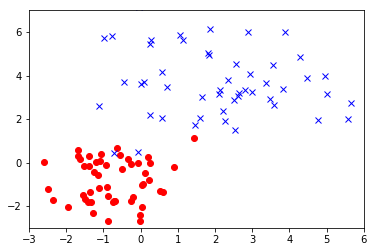

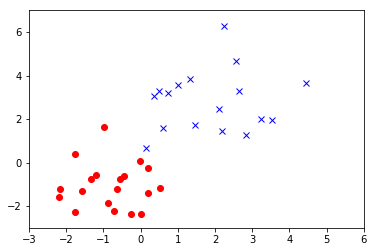

In [ ]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 2))
Ttrain[:50, 0] = 1
Ttrain[50:, 1] = 1
#print(Ttrain[50:])
means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 2))
Ttest[:20, 0] = 1
Ttest[20:, 1] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

In [ ]:
X1 = np.hstack((np.ones((N, 1)), Xtrain))
print(X1.shape,Ttrain.shape)
n_col_X1=np.array(X1.shape)[1]
net_test = NeuralNetLogReg([n_col_X1,7,2])
net_test.train(X1, Ttrain)
X1t = np.hstack((np.ones((Xtest.shape[0],1)), Xtest))
classes,pre,prob = net_test.use(X1t)
print(classes)
print(np.unique(classes))

(100, 3) (100, 2)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
[1]


Accuracy:  50.0 %


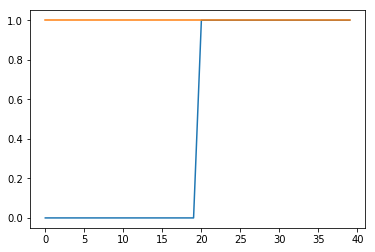

In [ ]:
Tl = np.argmax(Ttest, 1)

plt.plot(Tl)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - classes)) * 100, "%")

## Code for the cross-validation(Non-linear Logistic Regression):-

## Explaination of the Cross-Validation Code:-

In order to implement cross validation, I have followed the algorithm provided by the professor. My implementation consists of below steps:-
1. First, I have taken whole available data, to perform cross validation.
2. Then I divided, data into 5 folds using kFold of scikit-learn.
3. I hold out the X_test_cv which corresponds to the testing data for the first partitioning of trian data i.e X_train_cv.
4. Now, once I have the X_train_cv data, I need to divide this data into 4 partions - 3 for training and 1 for validation part. To do this, I again use KFold.
5. Now once I have the data with all splits, I performed the training and validation part by taking validation set as one out of 4 partition every time and calculated the accuracy after each iteration and retain the best accuracy.
6. With this best accuracy,I trained the model with whole X_train_cv data and tested X_test_cv data which were taken out in outer 'for' loop.
7. Then stored the final accuracy corrsponding to the first iteration in new array(test_err).
8. Performed steps 2 to 7 on each data set that I got from kfold.
9. Once all the above steps are completed, we can have the weight paramter which is giving maximum accuracy. Now with this parameter I have trained the 8000 data and tested the resuls on 2000 data.


In [ ]:
import sklearn
from sklearn.model_selection import KFold
def cross_validation_log(xdata,ydata,nfolds,layers):
    errors = []
    testErrs = []
    #xdata=xdata[0:7000]   
    i = 0
    if len(xdata)/nfolds >= 1 and len(ydata)/nfolds >= 1:
        kf = KFold(n_splits = nfolds)
    for train_index, test_index in kf.split(xdata):
        residual=[]
        para=[]    
        #print("TRAIN:", train_index, "TEST:", test_index)
        kf_val = KFold(n_splits = nfolds-1)
        x_temp = xdata[train_index]
        
        X_train_cv = np.array(xdata)[train_index]
        X_test_cv = np.array(xdata)[test_index]
            
        Y_train_cv = np.array(ydata)[train_index]
        Y_test_cv = np.array(ydata)[test_index]
        
        #print(x_temp.shape)
        #print(xdata[train_index])
        
        for train_index_val,validation_index in kf_val.split(x_temp):
            #print("TRAIN:", train_index_val, "Validation:", validation_index)
            #print(x_temp[train_index_val])
            
            X_train_new = np.array(x_temp)[train_index_val]
            X_val_new = np.array(x_temp)[validation_index]
            
            Y_train_new = np.array(ydata)[train_index_val]
            Y_val_new = np.array(ydata)[validation_index]
            
            n_col=np.array(xdata.shape)[1]
            for neurons in layers:
                #print(neurons)
                #print(X_train_new)
                #print(X_val_new)
                
                net = NeuralNetLogReg([n_col,neurons,2])
                #ydtrain=np.zeros([Y_train_new.shape[0],2])
                #ydtrain[:,0]=(Y_train_new==1)
                #ydtrain[:,1]=(Y_train_new==0)
                net.train(X_train_new, Y_train_new)
                classes,pre,prob = net.use(X_val_new)
                accuracy = 100 - np.mean(np.abs(Y_val_new - classes)) * 100
                #print(accuracy)
                residual.append(accuracy)
                para.append(neurons)
            #print(len(residual))
        print("Done with",i+1,"iteration on whole data")
        i+=1
        best_acc = max(residual)
        minInd = residual.index(best_acc)
        weight = para[minInd]
        errors.append([weight,best_acc])
        print(errors)
        print("--------------------------------------------------")
        net_cv = NeuralNetLogReg([n_col,weight,2])
        net_cv.train(X_train_cv, Y_train_cv)
        cls,pre_1,prob_1 = net_cv.use(X_test_cv)
        print(np.unique(cls))
        test_err = 100 - np.mean(np.abs(Y_test_cv - cls))*100
        rmse_error =np.sqrt(np.sum((Y_test_cv-cls)**2))
        testErrs.append([weight,test_err])
        
        
    #print(testErrs)
    
    return testErrs

In [ ]:
print('Total Unique in :-',np.unique(T_total_class))
xscale= X_total_class.values
Tscale=T_total_class.values
print("Unique Values in Target Data :- ",np.unique(Tscale))
#print(Tscale.shape)
layers=[8,9,10,15,18]
accuracy=cross_validation_log(xscale,Tscale,5,layers)
print("Accuracy :- ",accuracy)

Total Unique in :- [0 1]
Unique Values in Target Data :-  [0 1]


C:\Users\jogle\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


Done with 1 iteration on whole data
[[10, 62.05263157894737]]
--------------------------------------------------
[1]
Done with 2 iteration on whole data
[[10, 62.05263157894737], [8, 61.89473684210526]]
--------------------------------------------------
[1]
Done with 3 iteration on whole data
[[10, 62.05263157894737], [8, 61.89473684210526], [8, 62.07259337190953]]
--------------------------------------------------
[1]
Done with 4 iteration on whole data
[[10, 62.05263157894737], [8, 61.89473684210526], [8, 62.07259337190953], [9, 61.89473684210526]]
--------------------------------------------------
[0]


In [ ]:
plt.plot(accuracy)

## Implementation on Classification Data

In [ ]:
data_temp = data2[['AveragePrice','TotalVolume','Total Bags']].copy()
data_temp  = data2.sort_values(by='type')
unique1, counts1 = np.unique(data_temp.type, return_counts=True)
#print(unique1,counts1)
X_train_temp = data_temp[['AveragePrice','TotalVolume','Total Bags']]
X_train_temp_1 = X_train_temp[0:5000]
X_train_temp_2 = X_train_temp[5000:10000]
X_train_temp = np.vstack((X_train_temp_1.values,X_train_temp_2.values))
#print(X_train_temp)
#print(unique1,counts1)
T_train_temp = data_temp[['type']]
T_train_temp_1 = T_train_temp[0:5000]
T_train_temp_2 = T_train_temp[5000:10000]
T_train_temp = np.vstack((T_train_temp_1.values,T_train_temp_2.values))
#print(T_train_temp)
unique2, counts2 = np.unique(T_train_temp, return_counts=True)
#print(unique2,counts2)
#########################################################
print("Train Shape Check:", X_train_temp.shape, T_train_temp.shape)

In [ ]:
X_train_class = X_total_class.iloc[0:8000].values
T_train_class = T_total_class.iloc[0:8000].values
print("Train Shape Check:", X_train_class.shape, T_train_class.shape)
print("Unique Values in Train :-",np.unique(T_train_class))

X_test_class = X_total_class.iloc[8000:12000].values
T_test_class = T_total_class.iloc[8000:12000].values
print("Test Shape Check:", X_test_class.shape, T_test_class.shape)
print("Unique Values in Test :-",np.unique(T_test_class))


n_col_train=np.array(X_train_class.shape)[1]
best_para = max(accuracy,key = lambda x:x[1])
print(best_para)

final_train_nnlog = NeuralNetLogReg([n_col_train,best_para[0],2])
final_train_nnlog.train(X_train_class, T_train_class,ftracep = True)

predicted_values_nnlog,pre_log,prob_log = final_train_nnlog.use(X_test_class)
acc = 100 - np.mean(np.abs(T_test_class - predicted_values_nnlog)) *100
print("Accuracy: ",acc, "%")
print(np.unique(predicted_values_nnlog))

## Plots for results:-

In [ ]:
plt.figure(figsize=(21,5))
plt.plot(T_test_class,'-r')
plt.plot(predicted_values_nnlog,'-b')

## Discussions about parameter/network structure choice 

1. I have selected number of layers as the variable entity in each iteration, in order to check the accuracy of the model in cross validation.
2. Another important factor was the hidden unit which I were high initially while training the NeuralNet which caused a lot of time for training so then I reduced it to lower values.
3. I am also training with different lambda values and then choosing the one which is giving max accuracy for the training of whole data.
4. Previously, I was testing with all the feature vector, but it was not giving the appropriate accuracy, hence I choose the features which were highly related to each other. To find out the highly correlated features, I plotted the correlation matrix and chose the features on the basis of matrices.
5. As we choose the paramter which is giving less error in the cross validation for the training of the whole model, we get the better results at the end. Hence cross validation plays important role in case of paramter selection for the model.

## Discussion about the prediction results

- From the plotted graphs, it can be inferred that the RMSE error in the non-linear regression and non-linear logistic regression decrease w.r.t to the number of samples. As the model figures out the predictions in much more efficient way in each iteration, error value decrease after each iteration.
- Graphs plotted after every iteration in the cross validation improves. This clearly shows that model is learning after every iteration.
- As it was taking very long time for the training in the cross validation, I perfomed the cross validation on 1000 - 5000 data.
- Once we got the best parameters corresponding to our data, predicted values are very similar to the actual values and hence line graph shows minimum deviation.
- From the plotted graph for the distribution of RMSE error over the samples shows that RMSE error were maximum for first few samples and it reduces in case of later samples as our model learns throughout the testing.
- The Nonlinear Regression tries to learn the weights of the features which can be used to understand the distribution of the data and hence it helps to improve the accuracy while predicting the target value.And hence non-linear regression is giving more accuracy 
- Optimality of the model depends on the multiple factors such as the distribution of the data, number of neurons(number of layers), learning rater etc.
- For the non-linear logistic regression, we first run the implementation on the toy data. As the implementation of the model runs successfully on the toy data, we apply the same on the classification data and analyze the results.
- One important observation that I figured out is that, sometimes we are getting biased output(either 0 or 1) as the cross validation may contains the data biased towards one class and hence our model gives biased output.
- This can be overcome if we have equal distributions of all the classes in the target variable.

# Conclusions

- I studied the importance of the cross validation on the dataset and how it helps to improve the accuracy.Although, splitting of the data into parts and implementing it on whole data takes a lot of time, it helps to find out the suitable training parameter for our data. 


- Understnading of the neural network concepts were bit difficult for me as it involves complex mathematics. But the application of neural network algorithms helped me to understand the concepts in more better way. This assignment helped me to understand the basic structure of neural network. As the number of layers increase, so does the time taken to run the code.


- It is very important to find best parameter for our model and data so that we can achieve the maximum accuracy in both regression as well as in classification.

## References

1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
2. https://www.kdnuggets.com/2017/09/visualizing-cross-validation-code.html
3. https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e
4. https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-ML%20Methodology.ipynb


## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
